##Data Preprocessing and Descriptive Analysis##
###Data Cleaning:  ###  

Handle missing values by either imputing them or removing incomplete records.
Remove duplicate entries to avoid bias.

###Feature Extraction:  ###

####Time Features:####  
Extract day of the week, month, and hour from the scheduled and actual times to capture temporal patterns.

####Delay Features: ####  
Calculate initial delays (e.g., difference between STA and ATA) to use as predictors.

####Flight Information:####  
 Encode categorical variables like airline and aircraft type using techniques such as one-hot encoding.

###Normalization/Standardization:  ###

Normalize or standardize numerical features to ensure they are on a similar scale, which helps certain algorithms perform better.

###Handling Outliers: ###

Identify and handle outliers in the delay minutes to prevent them from skewing the model.

###Feature Selection:  ###

Use techniques like correlation analysis and feature importance from tree-based models to select the most relevant features.

###Data Splitting:  ###

Split the data into training (60%), validation (20%), and testing (20%) datasets to ensure the model is evaluated properly.

###Encoding Categorical Variables:  ###

Convert categorical variables into numerical values using one-hot encoding or label encoding.

###Creating Interaction Features:  ###

Create new features by combining existing ones to capture more complex relationships (e.g., interaction between airline and time of day).

In [57]:


import pandas as pd
from datetime import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [58]:
# Remove ö,ä,ü, and special characters from dataset before import ´
# Import Data from csv 
movements = pd.read_csv("Flugbewegungen_export_20231029-20240918.csv", sep = ";")

# transform Day column to datetime 
movements['Tag'] = pd.to_datetime(movements['Tag'], format='%d.%m.%Y')

movements.head(7)

,Bewegungsart LSV,Tag,STA_STD_Time,ATA_ATD_Time,2 let code airline,Flugnummer,Registration,city name,3 let code Airport,AC Type 4 Letter,AC Type 3 Letter,GA Flag,Airline Name,Schengen,RTK,Gate,ATM definitiv,ATM prov.
0,L,2023-10-29,05:10:00,05:14:32,LX,LX177,HBJNF,Singapore,SIN,B77W,77W,-,Swiss International Air Lines AG,Non-Schengen,22,E42,1,0
1,L,2023-10-29,05:10:00,05:20:38,LX,LX243,HBJHD,Dubai,DXB,A333,333,-,Swiss International Air Lines AG,Non-Schengen,21,E19,1,0
2,L,2023-10-29,05:10:00,05:36:45,LX,LX139,HBJMH,Hong Kong,HKG,A343,343,-,Swiss International Air Lines AG,Non-Schengen,22,E26,1,0
3,L,2023-10-29,05:15:00,05:09:52,LX,LX055,HBJHA,Boston,BOS,A333,333,-,Swiss International Air Lines AG,Non-Schengen,21,E23,1,0
4,L,2023-10-29,05:15:00,05:19:29,LX,LX017,HBJHG,New York,JFK,A333,333,-,Swiss International Air Lines AG,Non-Schengen,24,E35,1,0
5,L,2023-10-29,05:15:00,05:33:04,LX,LX283,HBJMI,Johannesburg,JNB,A343,343,-,Swiss International Air Lines AG,Non-Schengen,22,E67,1,0
6,L,2023-10-29,05:15:00,05:35:13,LX,LX155,HBJHC,Mumbai,BOM,A333,333,-,Swiss International Air Lines AG,Non-Schengen,23,E53,1,0


In [59]:
movements.dtypes

Bewegungsart LSV              object
Tag                   datetime64[ns]
STA_STD_Time                  object
ATA_ATD_Time                  object
2 let code airline            object
Flugnummer                    object
Registration                  object
city name                     object
3 let code Airport            object
AC Type 4 Letter              object
AC Type 3 Letter              object
GA Flag                       object
Airline Name                  object
Schengen                      object
RTK                           object
Gate                          object
ATM definitiv                  int64
ATM prov.                      int64
dtype: object

In [60]:
# Add Columns Season, weekday, month, hour, minute, from both STA/STD and ATA/ATD, delayminutes

startW23 = datetime(2023, 10, 29)
startS24 = datetime(2024, 3, 31)
startW24 = datetime(2024, 10, 27)

movements['season'] = np.where((movements['Tag'].dt.date >= startW23.date()) &
                               (movements['Tag'].dt.date < startS24.date()), 'W23', 'S24')

movements['STA_STD_Datetime'] = pd.to_datetime(movements['Tag'].astype(str) + " " + movements['STA_STD_Time'].astype(str).str[-8:])
movements['ATA_ATD_Datetime'] = pd.to_datetime(movements['Tag'].astype(str) + " " + movements['ATA_ATD_Time'].astype(str).str[-8:])


movements['weekdaySTA_STD'] = movements['STA_STD_Datetime'].dt.dayofweek
movements['monthSTA_STD'] = movements['STA_STD_Datetime'].dt.month
movements['hourSTA_STD'] = movements['STA_STD_Datetime'].dt.hour
movements['minuteSTA_STD'] = movements['STA_STD_Datetime'].dt.minute
movements['weekdayATA_ATD'] = movements['ATA_ATD_Datetime'].dt.dayofweek
movements['monthATA_ATD'] = movements['ATA_ATD_Datetime'].dt.month
movements['hourATA_ATD'] = movements['ATA_ATD_Datetime'].dt.hour
movements['minuteATA_ATD'] = movements['ATA_ATD_Datetime'].dt.minute

movements.head(10)


,Bewegungsart LSV,Tag,STA_STD_Time,ATA_ATD_Time,2 let code airline,Flugnummer,Registration,city name,3 let code Airport,AC Type 4 Letter,...,STA_STD_Datetime,ATA_ATD_Datetime,weekdaySTA_STD,monthSTA_STD,hourSTA_STD,minuteSTA_STD,weekdayATA_ATD,monthATA_ATD,hourATA_ATD,minuteATA_ATD
0,L,2023-10-29,05:10:00,05:14:32,LX,LX177,HBJNF,Singapore,SIN,B77W,...,2023-10-29 05:10:00,2023-10-29 05:14:32,6,10,5,10,6,10,5,14
1,L,2023-10-29,05:10:00,05:20:38,LX,LX243,HBJHD,Dubai,DXB,A333,...,2023-10-29 05:10:00,2023-10-29 05:20:38,6,10,5,10,6,10,5,20
2,L,2023-10-29,05:10:00,05:36:45,LX,LX139,HBJMH,Hong Kong,HKG,A343,...,2023-10-29 05:10:00,2023-10-29 05:36:45,6,10,5,10,6,10,5,36
3,L,2023-10-29,05:15:00,05:09:52,LX,LX055,HBJHA,Boston,BOS,A333,...,2023-10-29 05:15:00,2023-10-29 05:09:52,6,10,5,15,6,10,5,9
4,L,2023-10-29,05:15:00,05:19:29,LX,LX017,HBJHG,New York,JFK,A333,...,2023-10-29 05:15:00,2023-10-29 05:19:29,6,10,5,15,6,10,5,19
5,L,2023-10-29,05:15:00,05:33:04,LX,LX283,HBJMI,Johannesburg,JNB,A343,...,2023-10-29 05:15:00,2023-10-29 05:33:04,6,10,5,15,6,10,5,33
6,L,2023-10-29,05:15:00,05:35:13,LX,LX155,HBJHC,Mumbai,BOM,A333,...,2023-10-29 05:15:00,2023-10-29 05:35:13,6,10,5,15,6,10,5,35
7,L,2023-10-29,05:20:00,05:12:48,LX,LX007,HBJHN,Chicago,ORD,A333,...,2023-10-29 05:20:00,2023-10-29 05:12:48,6,10,5,20,6,10,5,12
8,L,2023-10-29,05:20:00,05:34:32,LX,LX147,HBJHJ,New Delhi,DEL,A333,...,2023-10-29 05:20:00,2023-10-29 05:34:32,6,10,5,20,6,10,5,34
9,L,2023-10-29,05:20:00,05:43:38,WK,WK076,HBJMD,Arusha,JRO,A343,...,2023-10-29 05:20:00,2023-10-29 05:43:38,6,10,5,20,6,10,5,43


In [61]:
# Calculate Delay Actual - Scheduled 

movements['DelayMinutes'] = (movements['ATA_ATD_Datetime']-movements['STA_STD_Datetime']).dt.total_seconds()/60




In [62]:
print(movements['DelayMinutes'].mean())
print(movements['DelayMinutes'].median())
print(movements['DelayMinutes'].std())

15.238277871532537
9.283333333333333
30.21973669406138


In [63]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = movements['DelayMinutes'].quantile(0.25)
Q3 = movements['DelayMinutes'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 0.7166666666666667, Q3: 22.35, IQR: 21.633333333333336


In [64]:
# Get unique values from columnns to check for data varieties
unique_values_per_column = movements.apply(lambda col: col.unique())

for column in movements.columns:
    print(f"Unique values in '{column}':")
    print(movements[column].unique())
    print("\n")


Unique values in 'Bewegungsart LSV':
['L' 'S']


Unique values in 'Tag':
<DatetimeArray>
['2023-10-29 00:00:00', '2023-10-30 00:00:00', '2023-10-31 00:00:00',
 '2023-11-01 00:00:00', '2023-11-02 00:00:00', '2023-11-03 00:00:00',
 '2023-11-04 00:00:00', '2023-11-05 00:00:00', '2023-11-06 00:00:00',
 '2023-11-07 00:00:00',
 ...
 '2024-09-09 00:00:00', '2024-09-10 00:00:00', '2024-09-11 00:00:00',
 '2024-09-12 00:00:00', '2024-09-13 00:00:00', '2024-09-14 00:00:00',
 '2024-09-15 00:00:00', '2024-09-16 00:00:00', '2024-09-17 00:00:00',
 '2024-09-18 00:00:00']
Length: 326, dtype: datetime64[ns]


Unique values in 'STA_STD_Time':
['05:10:00' '05:15:00' '05:20:00' '05:30:00' '05:40:00' '05:45:00'
 '05:55:00' '06:00:00' '06:25:00' '06:30:00' '06:35:00' '06:40:00'
 '06:45:00' '06:50:00' '06:55:00' '07:05:00' '07:15:00' '07:20:00'
 '07:25:00' '07:30:00' '07:40:00' '07:45:00' '07:50:00' '07:55:00'
 '08:05:00' '08:10:00' '08:25:00' '08:30:00' '08:40:00' '08:45:00'
 '08:50:00' '08:55:00' '09:05:00'

In [95]:
movements.describe()

,Tag,ATM definitiv,ATM prov.,STA_STD_Datetime,ATA_ATD_Datetime,weekdaySTA_STD,monthSTA_STD,hourSTA_STD,minuteSTA_STD,weekdayATA_ATD,monthATA_ATD,hourATA_ATD,minuteATA_ATD,DelayMinutes
count,227544,227544.000000,227544.000000,227544,227544,227544.000000,227544.000000,227544.000000,227544.000000,227544.000000,227544.000000,227544.000000,227544.000000,227544.000000
mean,2024-04-18 15:57:44.444678656,0.937458,0.062542,2024-04-19 04:35:17.941145344,2024-04-19 04:50:32.237817600,2.991413,6.161841,12.168310,27.459656,2.991413,6.161841,12.381983,29.403258,15.238278
min,2023-10-29 00:00:00,0.000000,0.000000,2023-10-29 04:45:00,2023-10-29 04:51:27,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1416.000000
25%,2024-01-30 00:00:00,1.000000,0.000000,2024-01-30 20:00:00,2024-01-30 20:01:09.500000,1.000000,4.000000,8.000000,10.000000,1.000000,4.000000,9.000000,14.000000,0.716667
50%,2024-04-26 00:00:00,1.000000,0.000000,2024-04-26 09:07:30,2024-04-26 09:15:08,3.000000,6.000000,12.000000,30.000000,3.000000,6.000000,12.000000,29.000000,9.283333
75%,2024-07-08 00:00:00,1.000000,0.000000,2024-07-08 14:20:00,2024-07-08 14:35:33.249999872,5.000000,8.000000,16.000000,45.000000,5.000000,8.000000,16.000000,44.000000,22.350000
max,2024-09-18 00:00:00,1.000000,1.000000,2024-09-18 23:04:00,2024-09-18 21:40:27,6.000000,12.000000,23.000000,59.000000,6.000000,12.000000,23.000000,59.000000,1375.000000
std,NaN,0.242137,0.242137,NaN,NaN,2.010550,3.279146,4.687989,17.633564,2.010550,3.279146,4.752938,17.393907,30.219737


In [65]:
###Remove error values###
# 'GA Flag' : replace Y with True and  - with False 
# 'Schengen' : replace 'Schengen' with True and 'Non-Schengen' with false 
# '2 let code airline' : remove lines with - 

movements_cleaned = movements.copy()
movements_cleaned['GA Flag'] = movements_cleaned['GA Flag'].replace({'Y': True, '-': False})
movements_cleaned['Schengen'] = movements_cleaned['Schengen'].replace({'Schengen': True, 'Non-Schengen': False})
movements_cleaned['Bewegungsart LSV'] = movements_cleaned['Bewegungsart LSV'].replace( {'L': 'Arrival', 'S': 'Departure'})
movements_cleaned = movements_cleaned[movements_cleaned['GA Flag'] == False]

# movements_cleaned = movements_cleaned[movements_cleaned['2 let code airline'] != '-']
   
movements_cleaned.head(3)
# Replace '-' in '2 let code airline' with first 2 letters from 'Flugnummer'
movements_cleaned['2 let code airline'] = movements_cleaned.apply(lambda row: row['Flugnummer'][:2] if row['2 let code airline'] == '-' else row['2 let code airline'], axis=1)



C:\Users\louis\AppData\Local\Temp\ipykernel_10636\499489247.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movements_cleaned['GA Flag'] = movements_cleaned['GA Flag'].replace({'Y': True, '-': False})
C:\Users\louis\AppData\Local\Temp\ipykernel_10636\499489247.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movements_cleaned['Schengen'] = movements_cleaned['Schengen'].replace({'Schengen': True, 'Non-Schengen': False})


In [66]:
movements_cleaned.describe()

,Tag,ATM definitiv,ATM prov.,STA_STD_Datetime,ATA_ATD_Datetime,weekdaySTA_STD,monthSTA_STD,hourSTA_STD,minuteSTA_STD,weekdayATA_ATD,monthATA_ATD,hourATA_ATD,minuteATA_ATD,DelayMinutes
count,200407,200407.000000,200407.000000,200407,200407,200407.000000,200407.000000,200407.000000,200407.000000,200407.000000,200407.000000,200407.000000,200407.000000,200407.000000
mean,2024-04-19 00:12:47.829466880,0.937477,0.062523,2024-04-19 12:51:59.965869312,2024-04-19 13:07:51.952312064,3.003877,6.175308,12.189924,27.806863,3.003877,6.175308,12.419402,29.431397,15.866441
min,2023-10-29 00:00:00,0.000000,0.000000,2023-10-29 04:45:00,2023-10-29 04:51:27,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1285.233333
25%,2024-01-31 00:00:00,1.000000,0.000000,2024-01-31 19:02:30,2024-01-31 19:01:34,1.000000,4.000000,8.000000,10.000000,1.000000,4.000000,9.000000,14.000000,0.950000
50%,2024-04-26 00:00:00,1.000000,0.000000,2024-04-26 14:50:00,2024-04-26 15:06:55,3.000000,6.000000,12.000000,30.000000,3.000000,6.000000,12.000000,30.000000,9.550000
75%,2024-07-09 00:00:00,1.000000,0.000000,2024-07-09 05:00:00,2024-07-09 05:11:27,5.000000,8.000000,16.000000,45.000000,5.000000,8.000000,16.000000,44.000000,22.883333
max,2024-09-18 00:00:00,1.000000,1.000000,2024-09-18 20:55:00,2024-09-18 21:40:27,6.000000,12.000000,21.000000,55.000000,6.000000,12.000000,23.000000,59.000000,1037.383333
std,NaN,0.242103,0.242103,NaN,NaN,2.016271,3.270760,4.796996,17.530124,2.016271,3.270760,4.866533,17.369979,28.978093


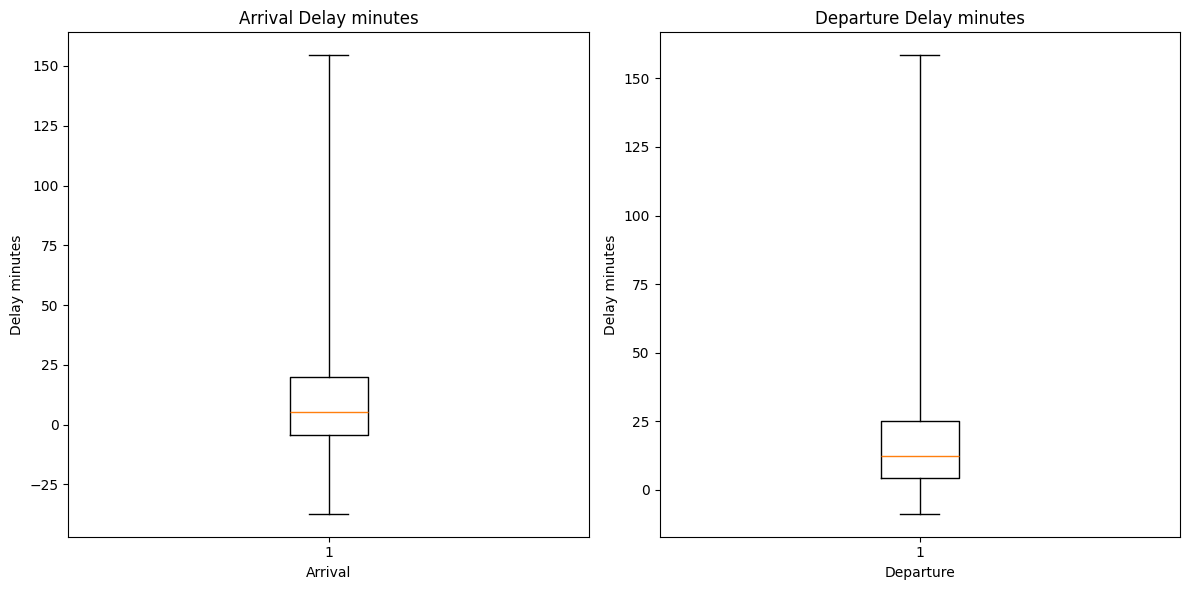

In [67]:
# Group the 'DelayMinutes' by 'Bewegungsart LSV'
# Filter the DataFrame for rows where 'Bewegungsart LSV' is 'Arrival'
delayminutes_arr = movements_cleaned[movements_cleaned['Bewegungsart LSV'] == 'Arrival']

# Filter the DataFrame for rows where 'Bewegungsart LSV' is 'Departure'
delayminutes_dep = movements_cleaned[movements_cleaned['Bewegungsart LSV'] == 'Departure']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# Create a boxplot 
plt.boxplot(delayminutes_arr['DelayMinutes'], whis=[0.5, 99.5], showfliers=False)

# Show the plot
plt.title('Arrival Delay minutes')
plt.ylabel('Delay minutes')
plt.xlabel('Arrival')
plt.tight_layout()

plt.subplot(1,2,2)
plt.boxplot(delayminutes_dep['DelayMinutes'], whis= [0.5, 99.5], showfliers=False)

# Show the plot
plt.title('Departure Delay minutes')
plt.ylabel('Delay minutes')
plt.xlabel('Departure')
plt.tight_layout()


plt.show()

In [68]:
dates_total = pd.read_csv("Share_Standard_dates.csv", sep = ";")
dates_total['date'] = pd.to_datetime(dates_total['date'].str[:10], format='%d.%m.%Y')


# Step 2: Remove '%' from 'Standard Concept OPS in %' and convert to numeric
dates_total['Standard Concept OPS in %'] = dates_total['Standard Concept OPS in %'].str.rstrip('%').astype(float)

# Step 3: Filter rows with percentage >= 95% / >= 90% / >= 85%
dates_95 = dates_total[dates_total['Standard Concept OPS in %'] >= 95]
dates_90 = dates_total[dates_total['Standard Concept OPS in %'] >= 90]
dates_85 = dates_total[dates_total['Standard Concept OPS in %'] >= 85]


dates_95.head(3)

,date,Standard Concept OPS in %
1,2023-01-02,96.0
2,2023-01-03,99.0
3,2023-01-04,95.0


###Filtered to the non-extreme days##
movements_cleaned.head(3)

In [69]:
movements_cleaned.head(3)

,Bewegungsart LSV,Tag,STA_STD_Time,ATA_ATD_Time,2 let code airline,Flugnummer,Registration,city name,3 let code Airport,AC Type 4 Letter,...,ATA_ATD_Datetime,weekdaySTA_STD,monthSTA_STD,hourSTA_STD,minuteSTA_STD,weekdayATA_ATD,monthATA_ATD,hourATA_ATD,minuteATA_ATD,DelayMinutes
0,Arrival,2023-10-29,05:10:00,05:14:32,LX,LX177,HBJNF,Singapore,SIN,B77W,...,2023-10-29 05:14:32,6,10,5,10,6,10,5,14,4.533333
1,Arrival,2023-10-29,05:10:00,05:20:38,LX,LX243,HBJHD,Dubai,DXB,A333,...,2023-10-29 05:20:38,6,10,5,10,6,10,5,20,10.633333
2,Arrival,2023-10-29,05:10:00,05:36:45,LX,LX139,HBJMH,Hong Kong,HKG,A343,...,2023-10-29 05:36:45,6,10,5,10,6,10,5,36,26.750000


In [70]:
# Filtering movements_cleaned to keep only the rows where 'Tag' is in dates_95['Date']
filtered_movements_95 = movements_cleaned[movements_cleaned['Tag'].isin(dates_95['date'])]
filtered_movements_90 = movements_cleaned[movements_cleaned['Tag'].isin(dates_90['date'])]
filtered_movements_85 = movements_cleaned[movements_cleaned['Tag'].isin(dates_85['date'])]

filtered_movements_90.describe()

,Tag,ATM definitiv,ATM prov.,STA_STD_Datetime,ATA_ATD_Datetime,weekdaySTA_STD,monthSTA_STD,hourSTA_STD,minuteSTA_STD,weekdayATA_ATD,monthATA_ATD,hourATA_ATD,minuteATA_ATD,DelayMinutes
count,100724,100724.000000,100724.000000,100724,100724,100724.00000,100724.000000,100724.000000,100724.000000,100724.00000,100724.000000,100724.000000,100724.000000,100724.000000
mean,2024-04-14 23:00:10.150510592,0.958610,0.041390,2024-04-15 11:41:52.702831872,2024-04-15 11:54:51.430771200,2.95446,5.971109,12.231911,27.794547,2.95446,5.971109,12.413566,29.401255,12.978799
min,2023-10-29 00:00:00,0.000000,0.000000,2023-10-29 04:45:00,2023-10-29 04:51:27,0.00000,1.000000,3.000000,0.000000,0.00000,1.000000,3.000000,0.000000,-154.600000
25%,2024-02-03 00:00:00,1.000000,0.000000,2024-02-03 17:20:00,2024-02-03 17:33:35,1.00000,3.000000,8.000000,10.000000,1.00000,3.000000,9.000000,14.000000,0.000000
50%,2024-04-22 00:00:00,1.000000,0.000000,2024-04-22 04:17:30,2024-04-22 04:23:00,3.00000,6.000000,12.000000,30.000000,3.00000,6.000000,12.000000,30.000000,8.000000
75%,2024-07-07 00:00:00,1.000000,0.000000,2024-07-07 05:10:00,2024-07-07 05:24:00.249999872,5.00000,8.000000,16.000000,45.000000,5.00000,8.000000,16.000000,44.000000,19.616667
max,2024-09-14 00:00:00,1.000000,1.000000,2024-09-14 20:55:00,2024-09-14 21:14:00,6.00000,12.000000,21.000000,55.000000,6.00000,12.000000,23.000000,59.000000,1037.383333
std,NaN,0.199192,0.199192,NaN,NaN,1.99602,3.310952,4.788146,17.518941,1.99602,3.310952,4.833000,17.387368,25.922271


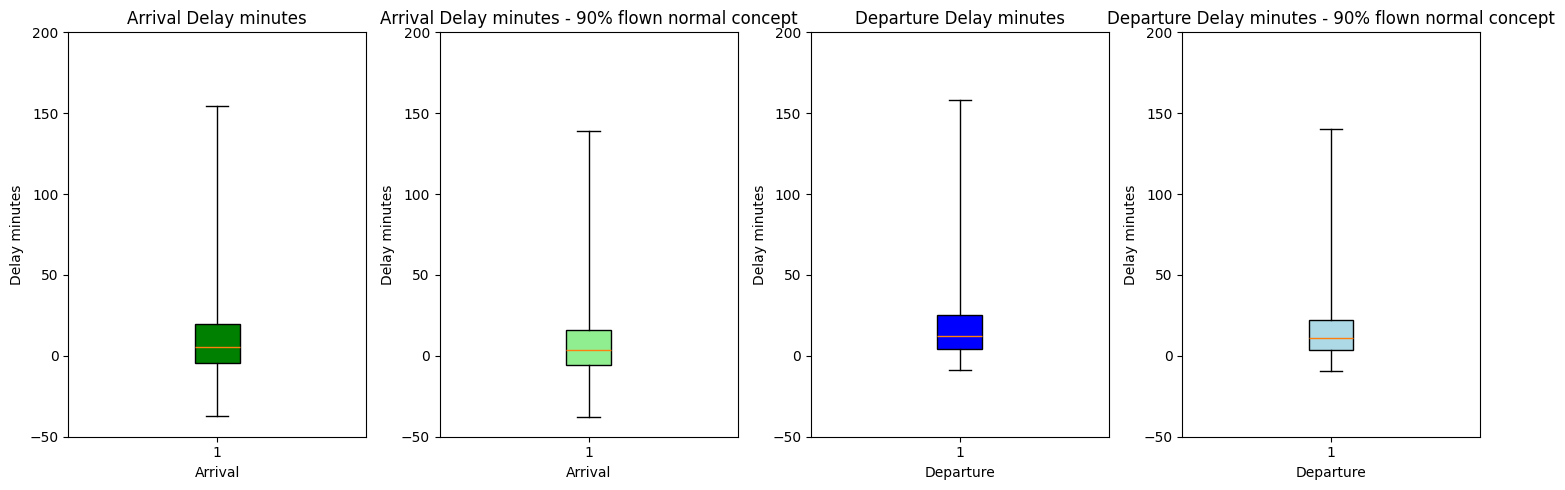

In [71]:
# Group the 'DelayMinutes' by 'Bewegungsart LSV'
# Filter the DataFrame for rows where 'Bewegungsart LSV' is 'Arrival'
delayminutes_arr_90 = filtered_movements_90[filtered_movements_90['Bewegungsart LSV'] == 'Arrival']

# Filter the DataFrame for rows where 'Bewegungsart LSV' is 'Departure'
delayminutes_dep_90 = filtered_movements_90[filtered_movements_90['Bewegungsart LSV'] == 'Departure']


# Create figure
plt.figure(figsize=(15, 5))

# Define boxplot data and colors
data = [
    delayminutes_arr['DelayMinutes'],  # Arrival
    delayminutes_arr_90['DelayMinutes'],  # Arrival 90%
    delayminutes_dep['DelayMinutes'],  # Departure
    delayminutes_dep_90['DelayMinutes']   # Departure 90%
]

colors = ['green', 'lightgreen','blue', 'lightblue']
titles = [
    'Arrival Delay minutes',
    'Arrival Delay minutes - 90% flown normal concept',
    'Departure Delay minutes',
    'Departure Delay minutes - 90% flown normal concept'
]

# Create subplots
for i in range(4):
    plt.subplot(1, 4, i + 1)
    box = plt.boxplot(data[i], whis=[0.5, 99.5], showfliers=False, patch_artist=True)

    # Fill box colors
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    
    # Set title and labels
    plt.title(titles[i])
    plt.ylabel('Delay minutes')
    plt.xlabel('Arrival' if i < 2 else 'Departure')
    plt.ylim(-50,200)
    plt.tight_layout()

# Show the plot
plt.show()


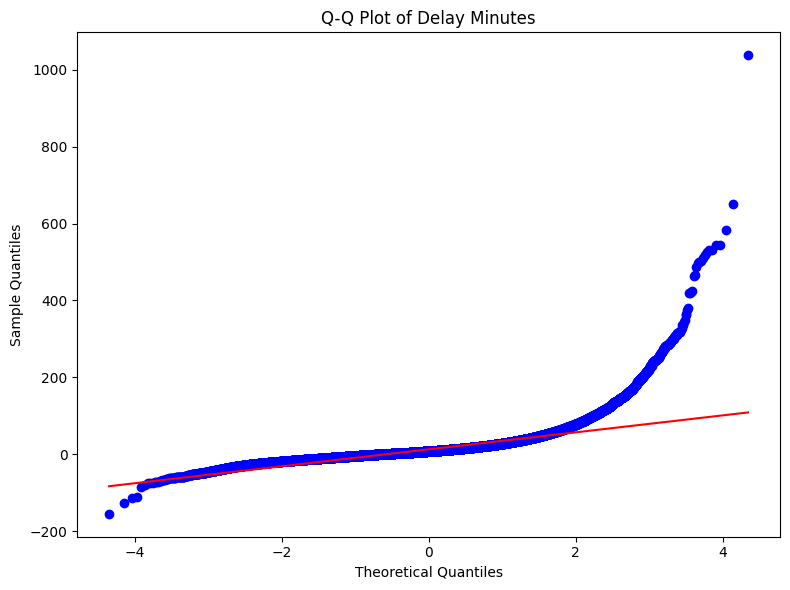

In [72]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(filtered_movements_90['DelayMinutes'], dist="norm", plot=plt)

# Add title and labels
plt.title('Q-Q Plot of Delay Minutes')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.tight_layout()
plt.show()


In [73]:
filtered_movements_90.columns

Index(['Bewegungsart LSV', 'Tag', 'STA_STD_Time', 'ATA_ATD_Time',
       '2 let code airline', 'Flugnummer', 'Registration', 'city name',
       '3 let code Airport', 'AC Type 4 Letter', 'AC Type 3 Letter', 'GA Flag',
       'Airline Name', 'Schengen', 'RTK', 'Gate', 'ATM definitiv', 'ATM prov.',
       'season', 'STA_STD_Datetime', 'ATA_ATD_Datetime', 'weekdaySTA_STD',
       'monthSTA_STD', 'hourSTA_STD', 'minuteSTA_STD', 'weekdayATA_ATD',
       'monthATA_ATD', 'hourATA_ATD', 'minuteATA_ATD', 'DelayMinutes'],
      dtype='object')

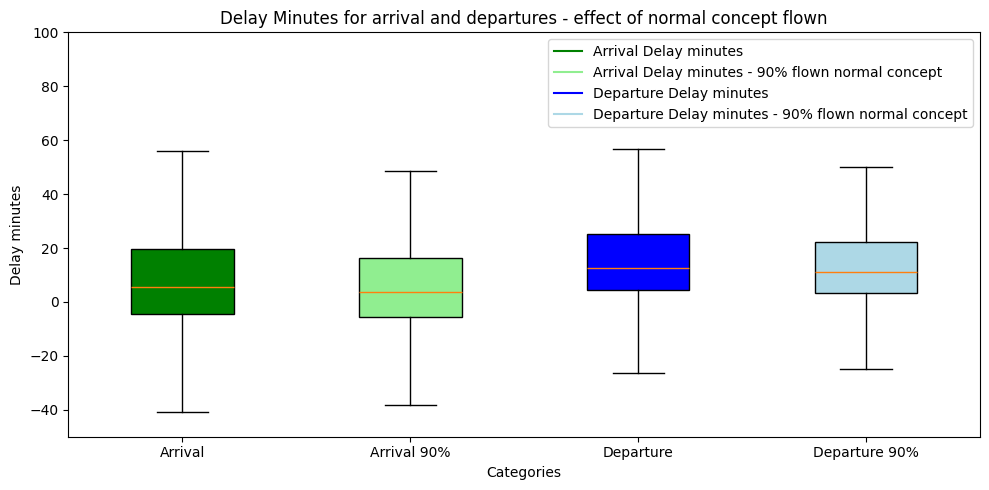

In [74]:
# Create figure
plt.figure(figsize=(10, 5))

# Define boxplot data and colors
data = [
    delayminutes_arr['DelayMinutes'],  # Arrival
    delayminutes_arr_90['DelayMinutes'],  # Arrival 90%
    delayminutes_dep['DelayMinutes'],  # Departure
    delayminutes_dep_90['DelayMinutes']   # Departure 90%
]

colors = ['green', 'lightgreen', 'blue', 'lightblue']
titles = [
    'Arrival Delay minutes',
    'Arrival Delay minutes - 90% flown normal concept',
    'Departure Delay minutes',
    'Departure Delay minutes - 90% flown normal concept'
]

# Create a single box plot with multiple boxes
box = plt.boxplot(data,showfliers=False, patch_artist=True)

# Fill box colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set labels and title
plt.ylabel('Delay minutes')
plt.xlabel('Categories')
plt.xticks([1, 2, 3, 4], ['Arrival', 'Arrival 90%', 'Departure', 'Departure 90%'])
plt.ylim(-50, 100)

# Add a legend
for i, title in enumerate(titles):
    plt.plot([], [], color=colors[i], label=title)

plt.legend(loc='upper right')
plt.title('Delay Minutes for arrival and departures - effect of normal concept flown')
# Show the plot
plt.tight_layout()
plt.show()


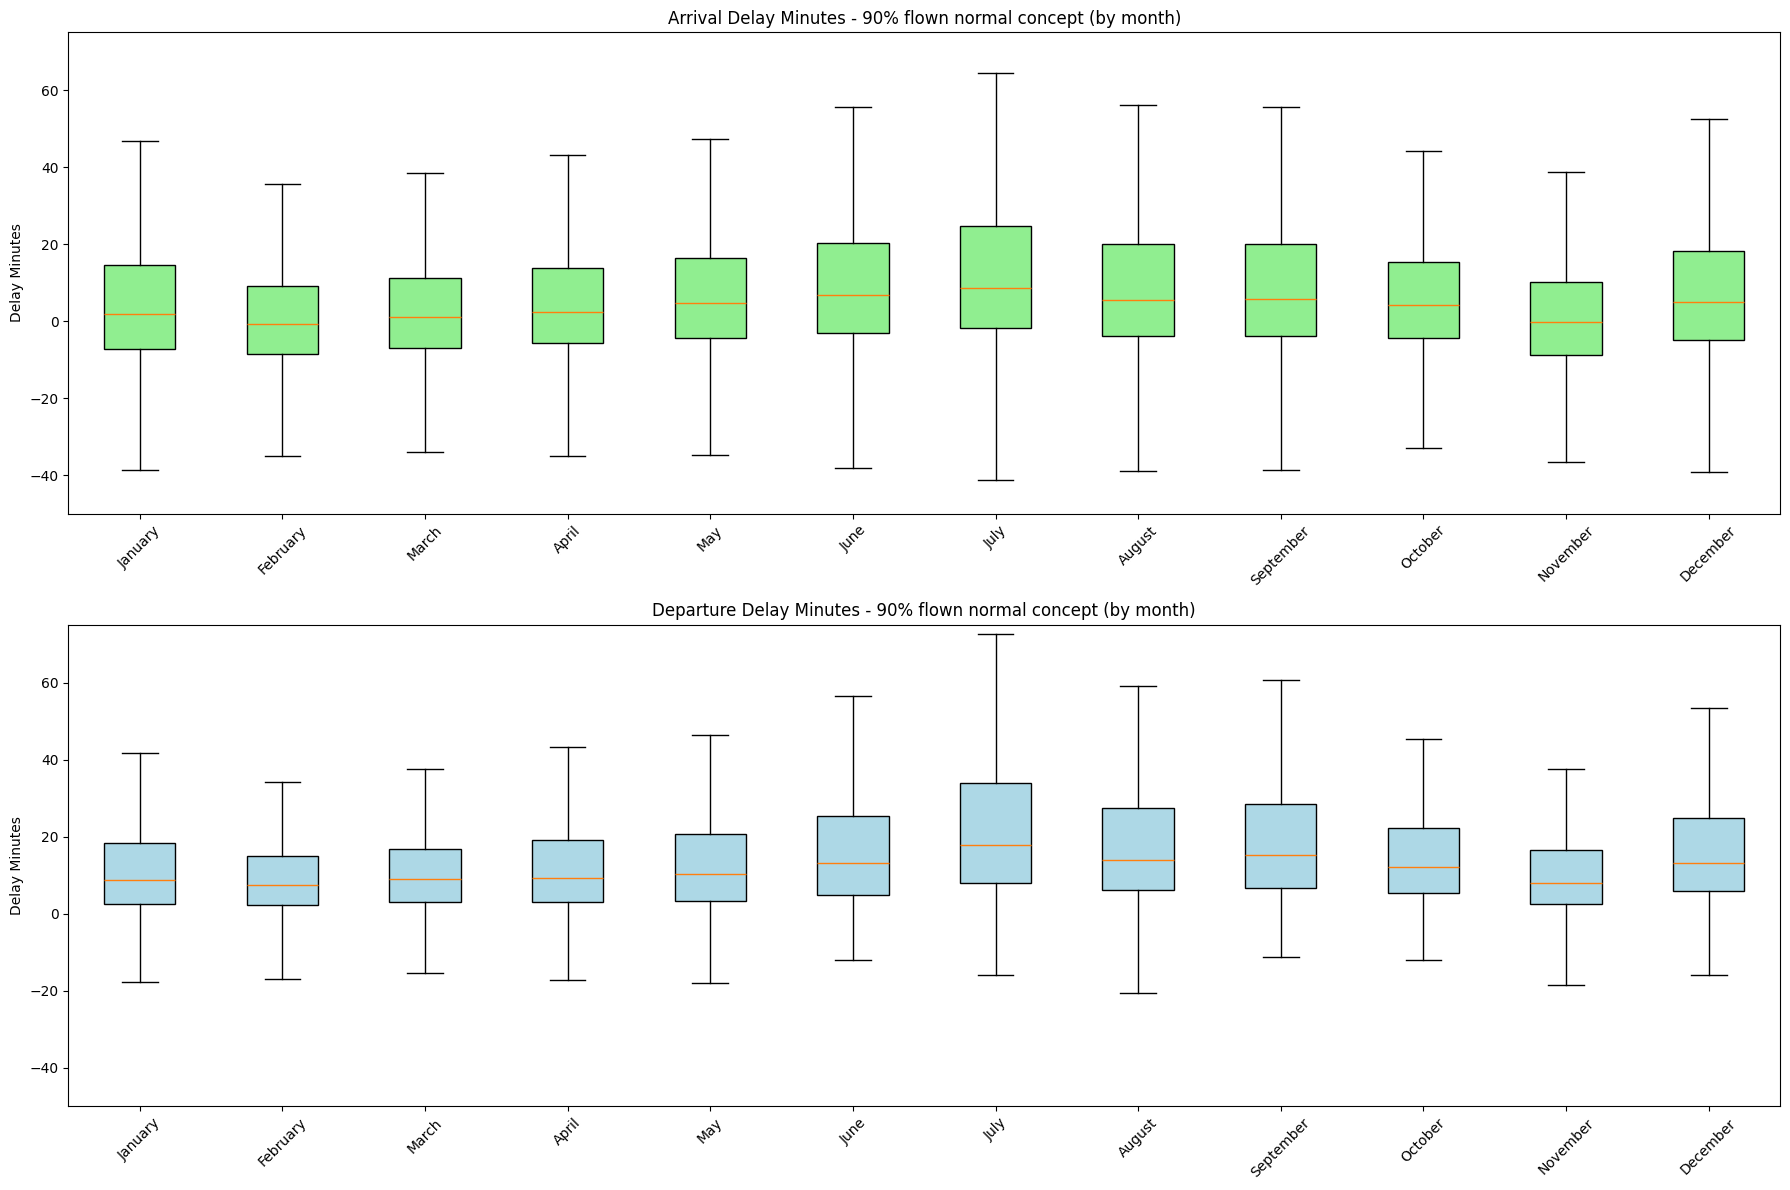

In [75]:
# Create a figure with two subplots (2 rows, 1 column)
plt.figure(figsize=(18, 12))

# Split data by months for arrival 90% and departure 90%
arrival_90_by_month = [delayminutes_arr_90[delayminutes_arr_90['monthSTA_STD'] == month]['DelayMinutes'] for month in range(1, 13)]
departure_90_by_month = [delayminutes_dep_90[delayminutes_dep_90['monthSTA_STD'] == month]['DelayMinutes'] for month in range(1, 13)]

# Colors for arrival and departure plots
arrival_colors = ['lightgreen'] * 12
departure_colors = ['lightblue'] * 12

# Month labels for x-axis
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot 1: Arrival 90% data
plt.subplot(2, 1, 1)
box1 = plt.boxplot(arrival_90_by_month, showfliers=False, patch_artist=True)
for patch, color in zip(box1['boxes'], arrival_colors):
    patch.set_facecolor(color)
plt.title('Arrival Delay Minutes - 90% flown normal concept (by month)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, 13), month_labels, rotation=45)
plt.ylim(-50, 75)

# Plot 2: Departure 90% data
plt.subplot(2, 1, 2)
box2 = plt.boxplot(departure_90_by_month, showfliers=False, patch_artist=True)
for patch, color in zip(box2['boxes'], departure_colors):
    patch.set_facecolor(color)
plt.title('Departure Delay Minutes - 90% flown normal concept (by month)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, 13), month_labels, rotation = 45)
plt.ylim(-50, 75)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [76]:
delayminutes_arr_90['weekdaySTA_STD']

0         6
1         6
2         6
3         6
4         6
         ..
112184    5
112185    5
112186    5
112187    5
112188    5
Name: weekdaySTA_STD, Length: 50346, dtype: int32

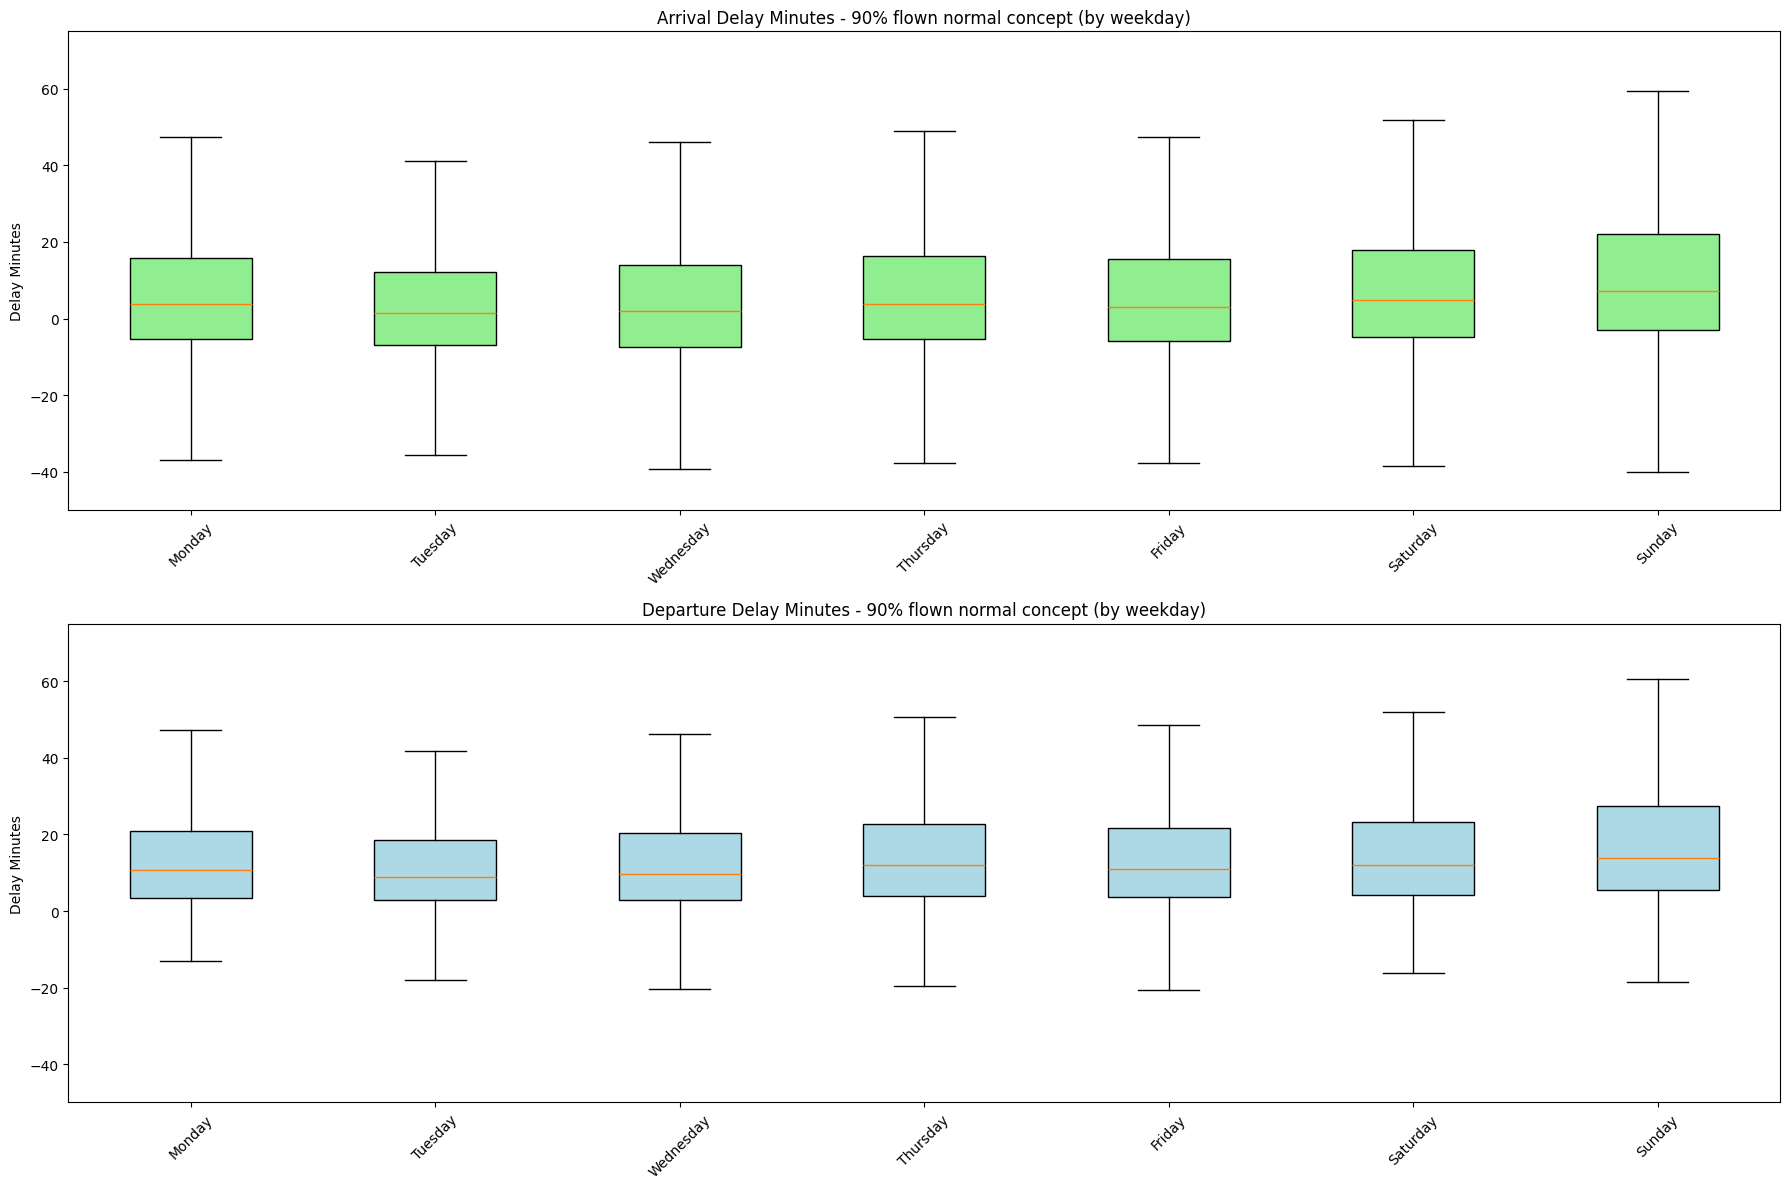

In [77]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (2 rows, 1 column)
plt.figure(figsize=(18, 12))

# Split data by weekday for arrival 90% and departure 90%
# Adjust weekday index to start from 1 (Monday=0, Sunday=6)
arrival_90_by_weekday = [delayminutes_arr_90[delayminutes_arr_90['weekdaySTA_STD'] == weekday]['DelayMinutes'] for weekday in range(0, 7)]
departure_90_by_weekday = [delayminutes_dep_90[delayminutes_dep_90['weekdaySTA_STD'] == weekday]['DelayMinutes'] for weekday in range(0, 7)]

# Colors for arrival and departure plots
arrival_colors = ['lightgreen'] * 7
departure_colors = ['lightblue'] * 7

# Weekday labels for x-axis
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot 1: Arrival 90% data
plt.subplot(2, 1, 1)
box1 = plt.boxplot(arrival_90_by_weekday, showfliers=False, patch_artist=True)
for patch, color in zip(box1['boxes'], arrival_colors):
    patch.set_facecolor(color)
plt.title('Arrival Delay Minutes - 90% flown normal concept (by weekday)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, 8), weekday_labels, rotation=45)  # Adjust x-ticks to start at 1
plt.ylim(-50, 75)

# Plot 2: Departure 90% data
plt.subplot(2, 1, 2)
box2 = plt.boxplot(departure_90_by_weekday, showfliers=False, patch_artist=True)
for patch, color in zip(box2['boxes'], departure_colors):
    patch.set_facecolor(color)
plt.title('Departure Delay Minutes - 90% flown normal concept (by weekday)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, 8), weekday_labels, rotation=45)  # Adjust x-ticks to start at 1
plt.ylim(-50, 75)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


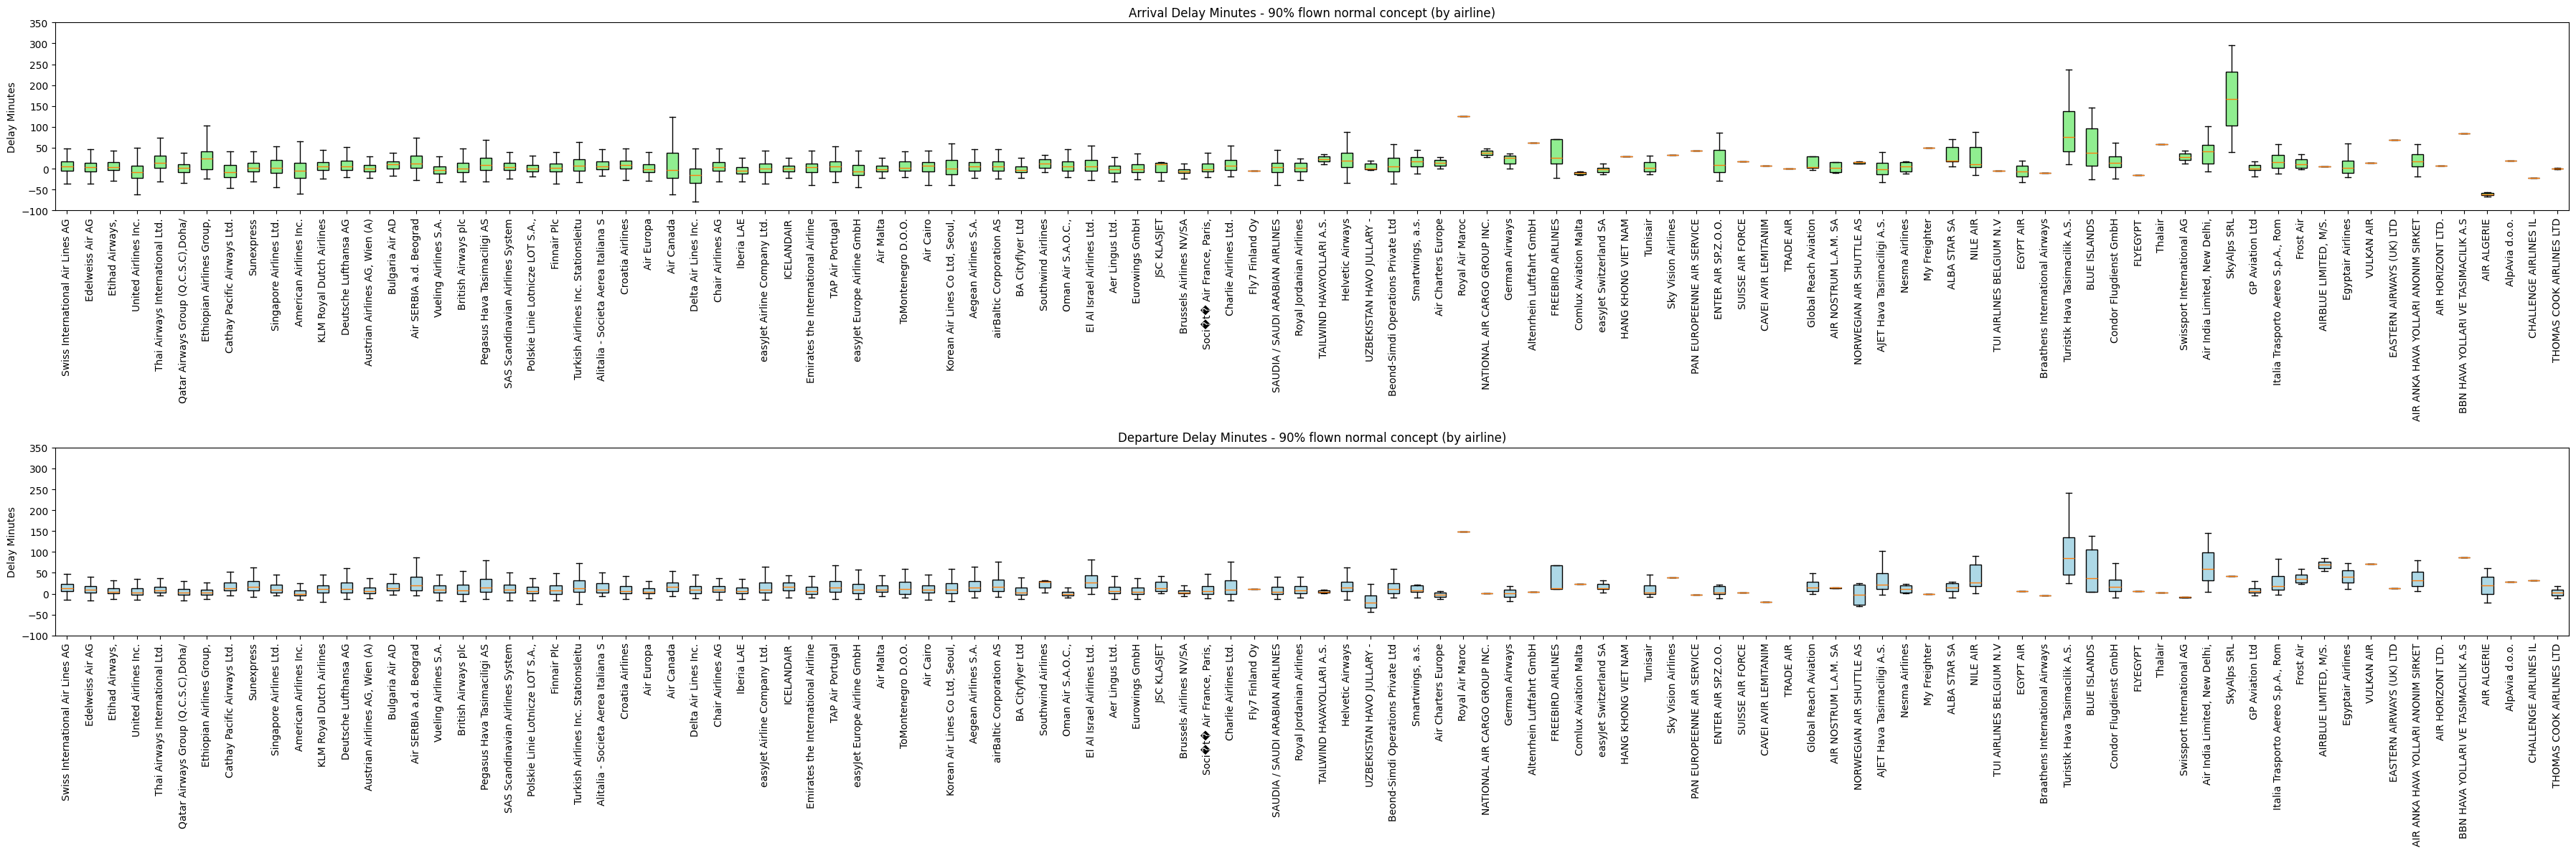

In [78]:
# Create a figure with two subplots (2 rows, 1 column)
plt.figure(figsize=(36, 12))

# Define unique airlines
airlines = delayminutes_arr_90['Airline Name'].unique()

# Create lists to hold the data for each airline (no weekday separation)
arrival_data = [delayminutes_arr_90[delayminutes_arr_90['Airline Name'] == airline]['DelayMinutes'].values 
                for airline in airlines]

departure_data = [delayminutes_dep_90[delayminutes_dep_90['Airline Name'] == airline]['DelayMinutes'].values 
                  for airline in airlines]

# Colors for arrival and departure plots
arrival_colors = ['lightgreen'] * len(airlines)
departure_colors = ['lightblue'] * len(airlines)

# Plot 1: Arrival 90% data
plt.subplot(2, 1, 1)
box1 = plt.boxplot(arrival_data, showfliers=False, patch_artist=True, positions=range(1, len(airlines) + 1))
for patch, color in zip(box1['boxes'], arrival_colors):
    patch.set_facecolor(color)
plt.title('Arrival Delay Minutes - 90% flown normal concept (by airline)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, len(airlines) + 1), airlines, rotation=90, fontsize=10)  # Set x-ticks to airline names
plt.ylim(-100, 350)

# Plot 2: Departure 90% data
plt.subplot(2, 1, 2)
box2 = plt.boxplot(departure_data, showfliers=False, patch_artist=True, positions=range(1, len(airlines) + 1))
for patch, color in zip(box2['boxes'], departure_colors):
    patch.set_facecolor(color)
plt.title('Departure Delay Minutes - 90% flown normal concept (by airline)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, len(airlines) + 1), airlines, rotation=90, fontsize=10)  # Set x-ticks to airline names
plt.ylim(-100, 350)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [79]:
delayminutes_arr_90.columns

Index(['Bewegungsart LSV', 'Tag', 'STA_STD_Time', 'ATA_ATD_Time',
       '2 let code airline', 'Flugnummer', 'Registration', 'city name',
       '3 let code Airport', 'AC Type 4 Letter', 'AC Type 3 Letter', 'GA Flag',
       'Airline Name', 'Schengen', 'RTK', 'Gate', 'ATM definitiv', 'ATM prov.',
       'season', 'STA_STD_Datetime', 'ATA_ATD_Datetime', 'weekdaySTA_STD',
       'monthSTA_STD', 'hourSTA_STD', 'minuteSTA_STD', 'weekdayATA_ATD',
       'monthATA_ATD', 'hourATA_ATD', 'minuteATA_ATD', 'DelayMinutes'],
      dtype='object')

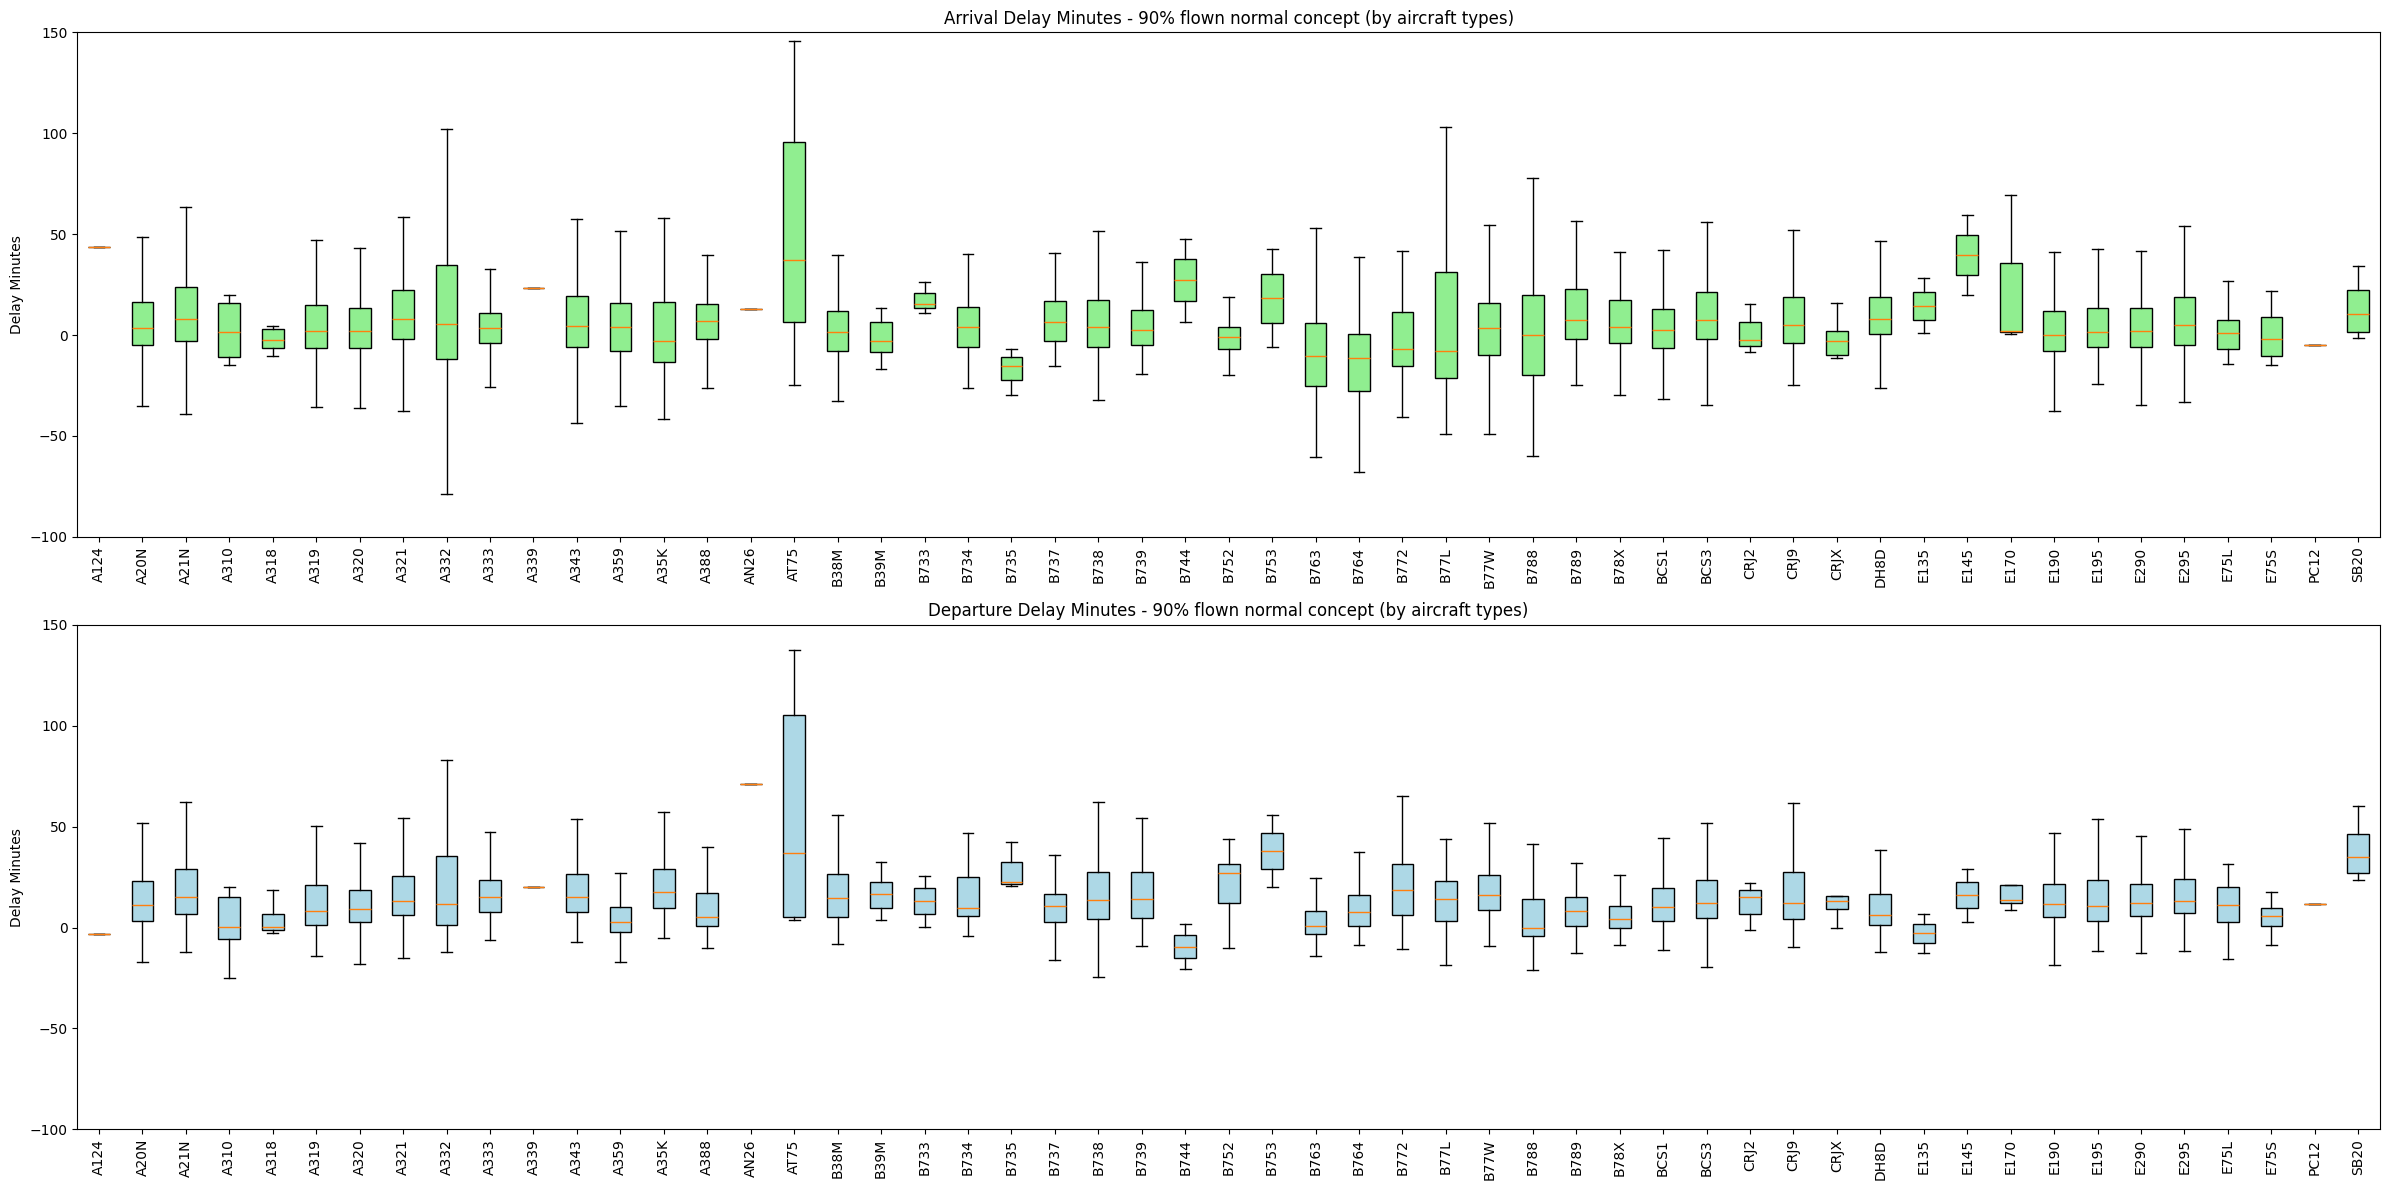

In [80]:
# Plot for Aircrafttypes
# Create a figure with two subplots (2 rows, 1 column)
plt.figure(figsize=(24, 12))

# Define unique aircrafttypes
aircrafttypes = np.sort(delayminutes_arr_90['AC Type 4 Letter'].unique())

# Create lists to hold the data for each aircrafttypes (no weekday separation)
arrival_data = [delayminutes_arr_90[delayminutes_arr_90['AC Type 4 Letter'] == aircrafttypes]['DelayMinutes'].values 
                for aircrafttypes in aircrafttypes]

departure_data = [delayminutes_dep_90[delayminutes_dep_90['AC Type 4 Letter'] == aircrafttypes]['DelayMinutes'].values 
                  for aircrafttypes in aircrafttypes]

# Colors for arrival and departure plots
arrival_colors = ['lightgreen'] * len(aircrafttypes)
departure_colors = ['lightblue'] * len(aircrafttypes)

# Plot 1: Arrival 90% data
plt.subplot(2, 1, 1)
box1 = plt.boxplot(arrival_data, showfliers=False, patch_artist=True, positions=range(1, len(aircrafttypes) + 1))
for patch, color in zip(box1['boxes'], arrival_colors):
    patch.set_facecolor(color)
plt.title('Arrival Delay Minutes - 90% flown normal concept (by aircraft types)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, len(aircrafttypes) + 1), aircrafttypes, rotation=90, fontsize=10)  # Set x-ticks to aircrafttypes names
plt.ylim(-100, 150)

# Plot 2: Departure 90% data
plt.subplot(2, 1, 2)
box2 = plt.boxplot(departure_data, showfliers=False, patch_artist=True, positions=range(1, len(aircrafttypes) + 1))
for patch, color in zip(box2['boxes'], departure_colors):
    patch.set_facecolor(color)
plt.title('Departure Delay Minutes - 90% flown normal concept (by aircraft types)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, len(aircrafttypes) + 1), aircrafttypes, rotation=90, fontsize=10)  # Set x-ticks to aircrafttypes names
plt.ylim(-100, 150)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [81]:
delayminutes_arr_90.columns

Index(['Bewegungsart LSV', 'Tag', 'STA_STD_Time', 'ATA_ATD_Time',
       '2 let code airline', 'Flugnummer', 'Registration', 'city name',
       '3 let code Airport', 'AC Type 4 Letter', 'AC Type 3 Letter', 'GA Flag',
       'Airline Name', 'Schengen', 'RTK', 'Gate', 'ATM definitiv', 'ATM prov.',
       'season', 'STA_STD_Datetime', 'ATA_ATD_Datetime', 'weekdaySTA_STD',
       'monthSTA_STD', 'hourSTA_STD', 'minuteSTA_STD', 'weekdayATA_ATD',
       'monthATA_ATD', 'hourATA_ATD', 'minuteATA_ATD', 'DelayMinutes'],
      dtype='object')

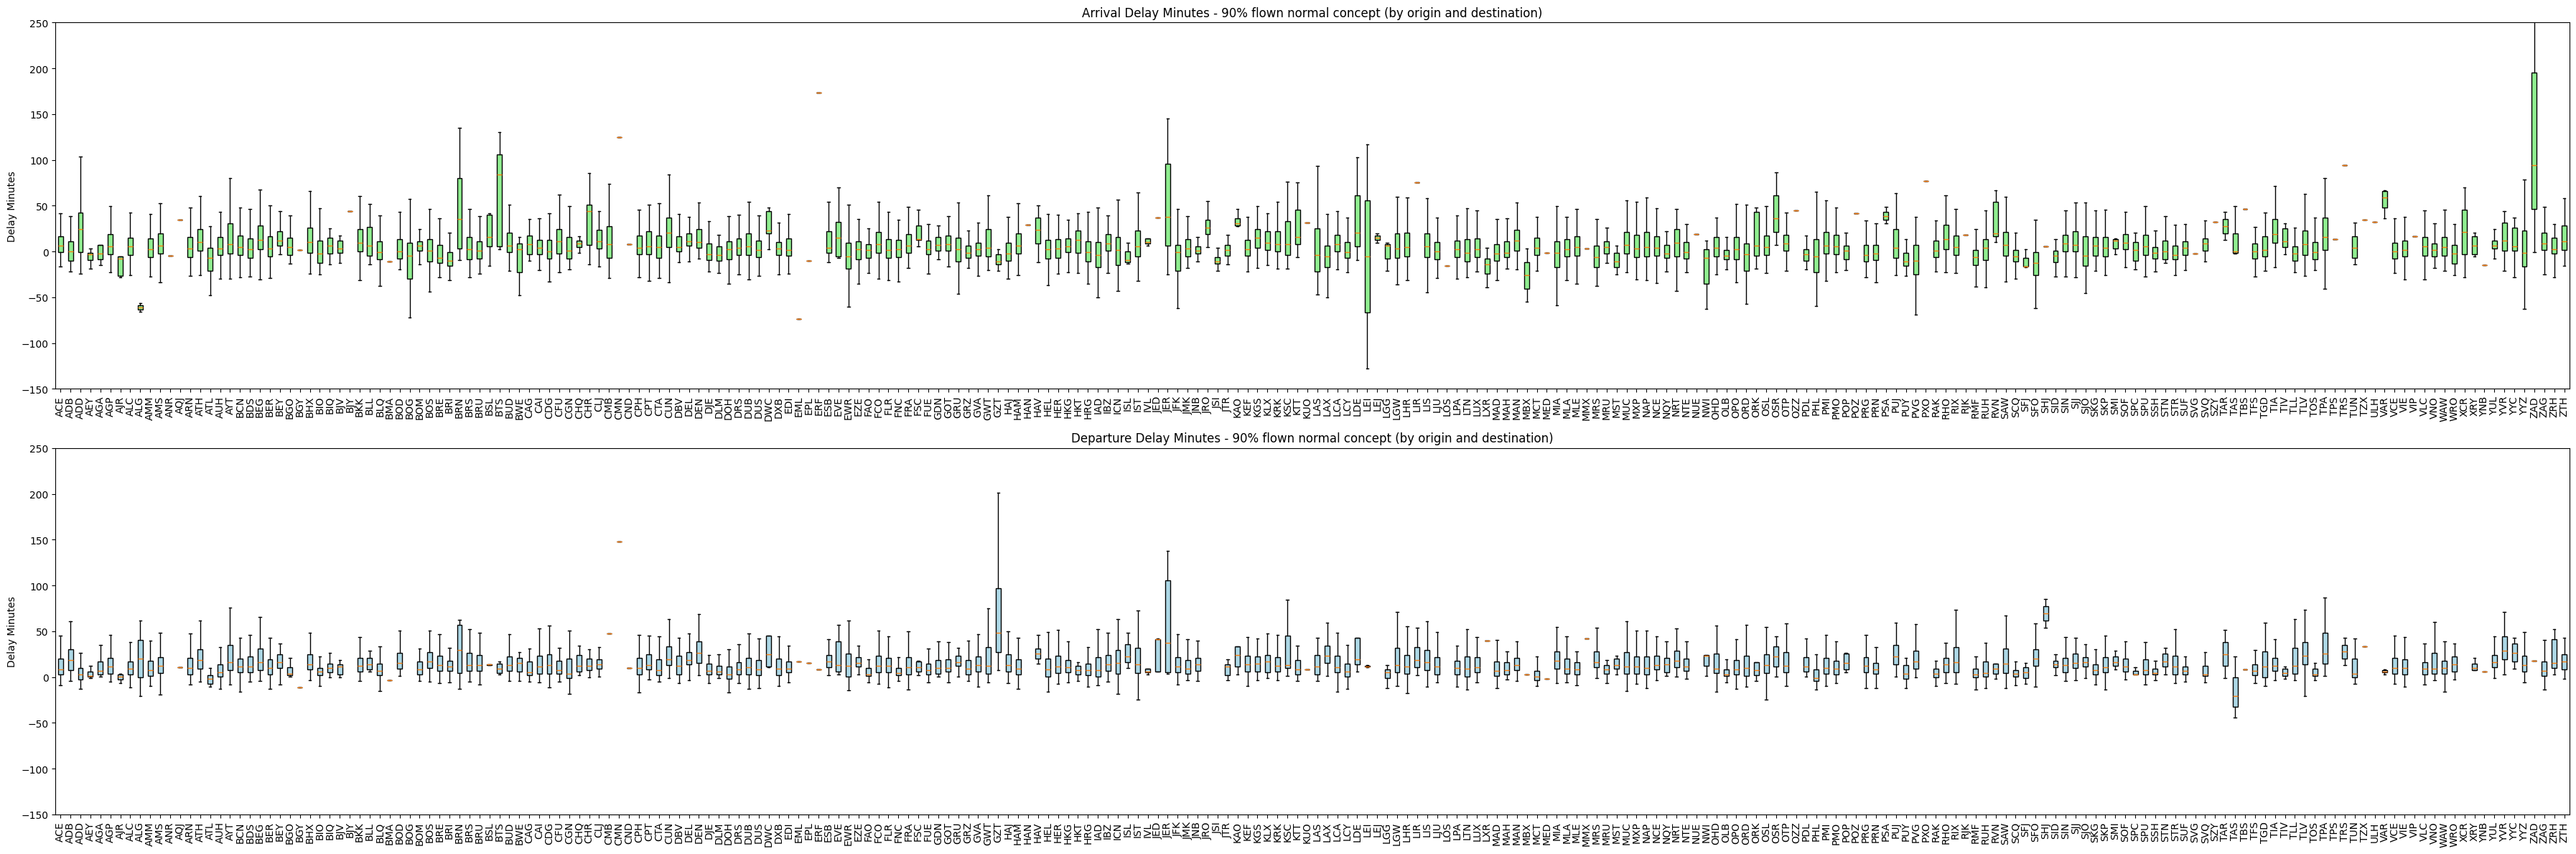

In [82]:
# Plot for Aircrafttypes
# Create a figure with two subplots (2 rows, 1 column)
plt.figure(figsize=(36, 12))

# Define unique aircrafttypes
orig_des = np.sort(delayminutes_arr_90['3 let code Airport'].unique())

# Create lists to hold the data for each aircrafttypes (no weekday separation)
arrival_data = [delayminutes_arr_90[delayminutes_arr_90['3 let code Airport'] == orig_des]['DelayMinutes'].values 
                for orig_des in orig_des]

departure_data = [delayminutes_dep_90[delayminutes_dep_90['3 let code Airport'] == orig_des]['DelayMinutes'].values 
                  for orig_des in orig_des]

# Colors for arrival and departure plots
arrival_colors = ['lightgreen'] * len(orig_des)
departure_colors = ['lightblue'] * len(orig_des)

# Plot 1: Arrival 90% data
plt.subplot(2, 1, 1)
box1 = plt.boxplot(arrival_data, showfliers=False, patch_artist=True, positions=range(1, len(orig_des) + 1))
for patch, color in zip(box1['boxes'], arrival_colors):
    patch.set_facecolor(color)
plt.title('Arrival Delay Minutes - 90% flown normal concept (by origin and destination)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, len(orig_des) + 1), orig_des, rotation=90, fontsize=10)  # Set x-ticks to orig_des names
plt.ylim(-150, 250)

# Plot 2: Departure 90% data
plt.subplot(2, 1, 2)
box2 = plt.boxplot(departure_data, showfliers=False, patch_artist=True, positions=range(1, len(orig_des) + 1))
for patch, color in zip(box2['boxes'], departure_colors):
    patch.set_facecolor(color)
plt.title('Departure Delay Minutes - 90% flown normal concept (by origin and destination)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, len(orig_des) + 1), orig_des, rotation=90, fontsize=10)  # Set x-ticks to orig_des names
plt.ylim(-150, 250)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


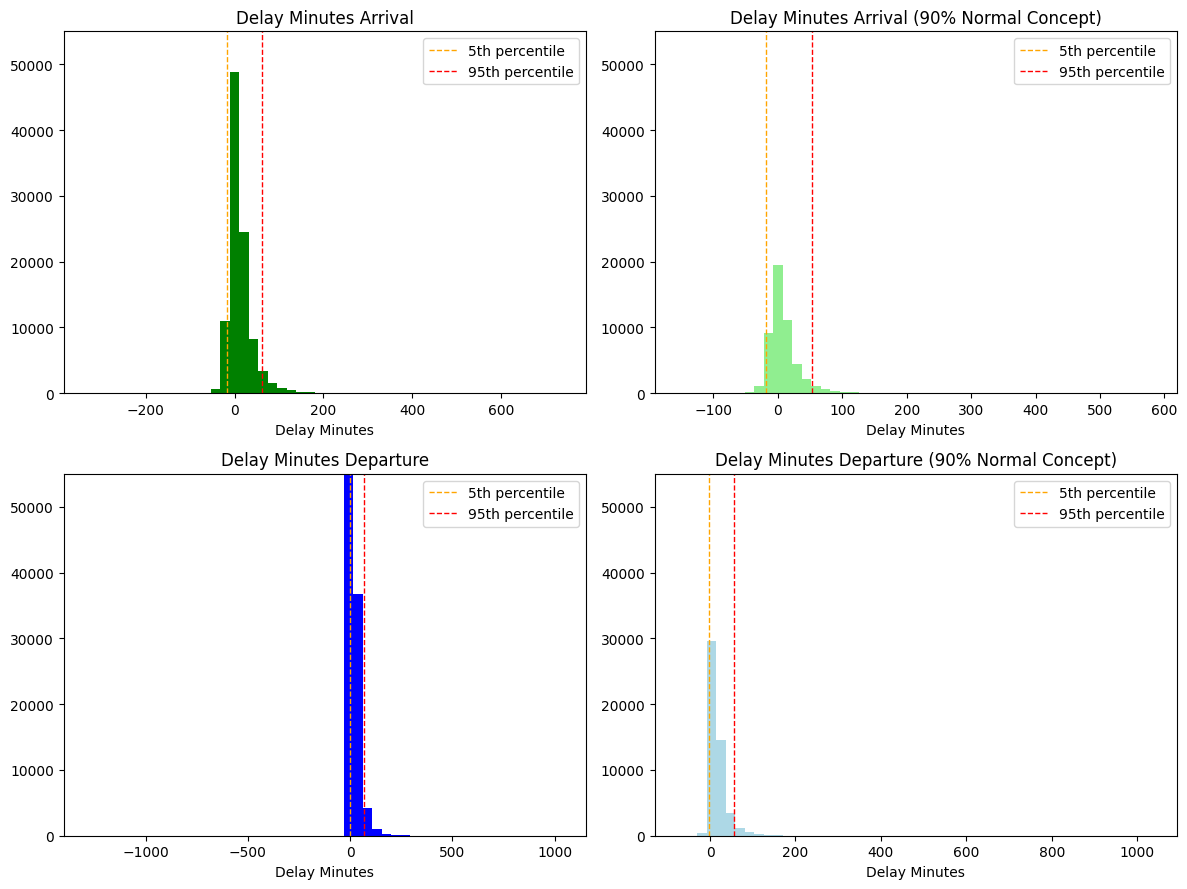

In [83]:
import numpy as np

# Calculate percentiles
p5_arr = np.percentile(delayminutes_arr['DelayMinutes'], 5)
p95_arr = np.percentile(delayminutes_arr['DelayMinutes'], 95)

p5_arr_90 = np.percentile(delayminutes_arr_90['DelayMinutes'], 5)
p95_arr_90 = np.percentile(delayminutes_arr_90['DelayMinutes'], 95)

p5_dep = np.percentile(delayminutes_dep['DelayMinutes'], 5)
p95_dep = np.percentile(delayminutes_dep['DelayMinutes'], 95)

p5_dep_90 = np.percentile(delayminutes_dep_90['DelayMinutes'], 5)
p95_dep_90 = np.percentile(delayminutes_dep_90['DelayMinutes'], 95)

plt.figure(figsize=(12,9))

# Plot 1: Delay Minutes Arrival
plt.subplot(2,2,1)
plt.hist(delayminutes_arr['DelayMinutes'], color= 'green', bins=50)
plt.axvline(p5_arr, color='orange', linestyle='dashed', linewidth=1, label='5th percentile')
plt.axvline(p95_arr, color='red', linestyle='dashed', linewidth=1, label='95th percentile')
plt.title('Delay Minutes Arrival')
plt.ylim(0,55000)
plt.xlabel('Delay Minutes')
plt.legend()

# Plot 2: Delay Minutes Arrival (90% Normal Concept)
plt.subplot(2,2,2)
plt.hist(delayminutes_arr_90['DelayMinutes'], color= 'lightgreen', bins=50)
plt.axvline(p5_arr_90, color='orange', linestyle='dashed', linewidth=1, label='5th percentile')
plt.axvline(p95_arr_90, color='red', linestyle='dashed', linewidth=1, label='95th percentile')
plt.title('Delay Minutes Arrival (90% Normal Concept)')
plt.ylim(0,55000)
plt.xlabel('Delay Minutes')
plt.legend()

# Plot 3: Delay Minutes Departure
plt.subplot(2,2,3)
plt.hist(delayminutes_dep['DelayMinutes'], color= 'blue', bins=50)
plt.axvline(p5_dep, color='orange', linestyle='dashed', linewidth=1, label='5th percentile')
plt.axvline(p95_dep, color='red', linestyle='dashed', linewidth=1, label='95th percentile')
plt.title('Delay Minutes Departure')
plt.ylim(0,55000)
plt.xlabel('Delay Minutes')
plt.legend()

# Plot 4: Delay Minutes Departure (90% Normal Concept)
plt.subplot(2,2,4)
plt.hist(delayminutes_dep_90['DelayMinutes'], color= 'lightblue', bins=50)
plt.axvline(p5_dep_90, color='orange', linestyle='dashed', linewidth=1, label='5th percentile')
plt.axvline(p95_dep_90, color='red', linestyle='dashed', linewidth=1, label='95th percentile')
plt.title('Delay Minutes Departure (90% Normal Concept)')
plt.ylim(0,55000)
plt.xlabel('Delay Minutes')
plt.legend()

plt.tight_layout()
plt.show()


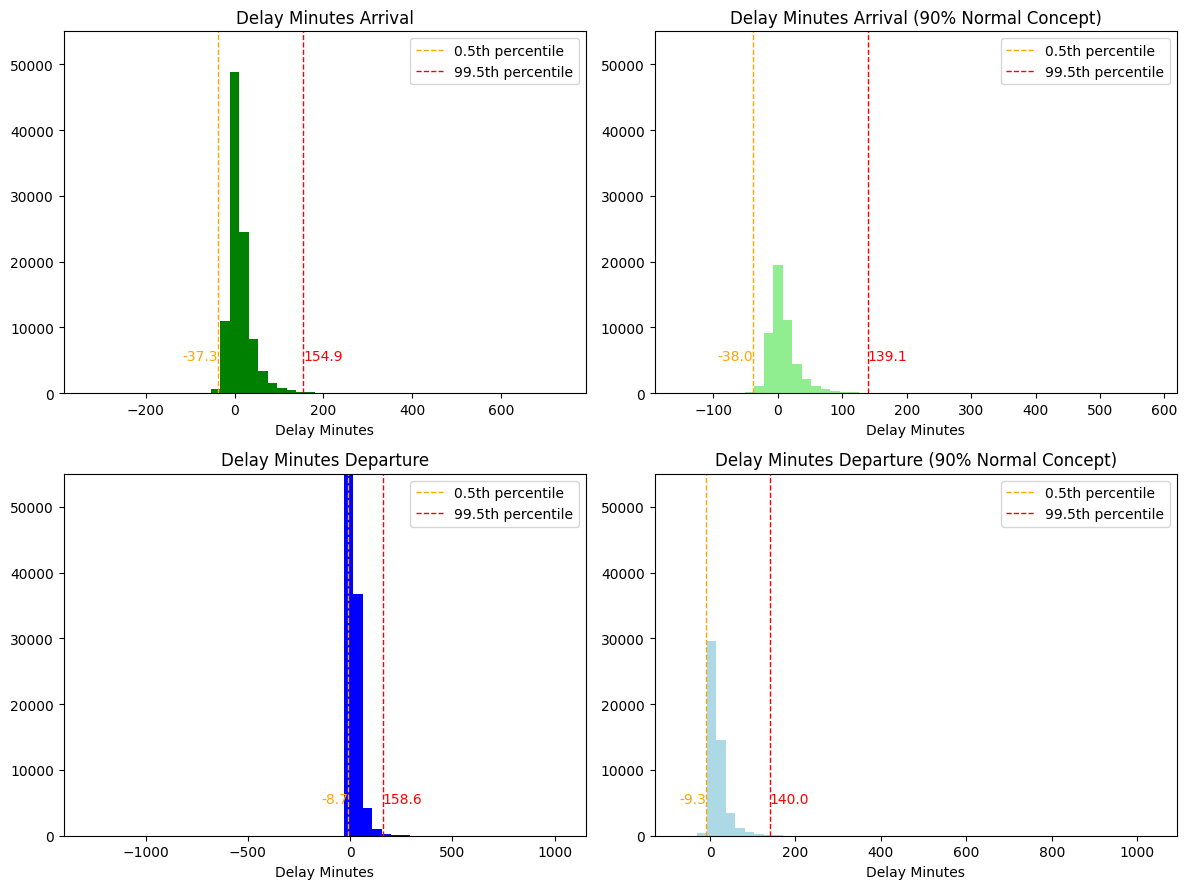

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate percentiles
p5_arr = np.percentile(delayminutes_arr['DelayMinutes'], 0.5)
p95_arr = np.percentile(delayminutes_arr['DelayMinutes'], 99.5)

p5_arr_90 = np.percentile(delayminutes_arr_90['DelayMinutes'], 0.5)
p95_arr_90 = np.percentile(delayminutes_arr_90['DelayMinutes'], 99.5)

p5_dep = np.percentile(delayminutes_dep['DelayMinutes'], 0.5)
p95_dep = np.percentile(delayminutes_dep['DelayMinutes'], 99.5)

p5_dep_90 = np.percentile(delayminutes_dep_90['DelayMinutes'], 0.5)
p95_dep_90 = np.percentile(delayminutes_dep_90['DelayMinutes'], 99.5)

plt.figure(figsize=(12,9))

# Plot 1: Delay Minutes Arrival
plt.subplot(2,2,1)
plt.hist(delayminutes_arr['DelayMinutes'], color='green', bins=50)
plt.axvline(p5_arr, color='orange', linestyle='dashed', linewidth=1, label='0.5th percentile')
plt.axvline(p95_arr, color='red', linestyle='dashed', linewidth=1, label='99.5th percentile')
plt.text(p5_arr, 5000, f'{p5_arr:.1f}', color='orange', fontsize=10, ha='right')
plt.text(p95_arr, 5000, f'{p95_arr:.1f}', color='red', fontsize=10, ha='left')
plt.title('Delay Minutes Arrival')
plt.ylim(0,55000)
plt.xlabel('Delay Minutes')
plt.legend()

# Plot 2: Delay Minutes Arrival (90% Normal Concept)
plt.subplot(2,2,2)
plt.hist(delayminutes_arr_90['DelayMinutes'], color='lightgreen', bins=50)
plt.axvline(p5_arr_90, color='orange', linestyle='dashed', linewidth=1, label='0.5th percentile')
plt.axvline(p95_arr_90, color='red', linestyle='dashed', linewidth=1, label='99.5th percentile')
plt.text(p5_arr_90, 5000, f'{p5_arr_90:.1f}', color='orange', fontsize=10, ha='right')
plt.text(p95_arr_90, 5000, f'{p95_arr_90:.1f}', color='red', fontsize=10, ha='left')
plt.title('Delay Minutes Arrival (90% Normal Concept)')
plt.ylim(0,55000)
plt.xlabel('Delay Minutes')
plt.legend()

# Plot 3: Delay Minutes Departure
plt.subplot(2,2,3)
plt.hist(delayminutes_dep['DelayMinutes'], color='blue', bins=50)
plt.axvline(p5_dep, color='orange', linestyle='dashed', linewidth=1, label='0.5th percentile')
plt.axvline(p95_dep, color='red', linestyle='dashed', linewidth=1, label='99.5th percentile')
plt.text(p5_dep, 5000, f'{p5_dep:.1f}', color='orange', fontsize=10, ha='right')
plt.text(p95_dep, 5000, f'{p95_dep:.1f}', color='red', fontsize=10, ha='left')
plt.title('Delay Minutes Departure')
plt.ylim(0,55000)
plt.xlabel('Delay Minutes')
plt.legend()

# Plot 4: Delay Minutes Departure (90% Normal Concept)
plt.subplot(2,2,4)
plt.hist(delayminutes_dep_90['DelayMinutes'], color='lightblue', bins=50)
plt.axvline(p5_dep_90, color='orange', linestyle='dashed', linewidth=1, label='0.5th percentile')
plt.axvline(p95_dep_90, color='red', linestyle='dashed', linewidth=1, label='99.5th percentile')
plt.text(p5_dep_90, 5000, f'{p5_dep_90:.1f}', color='orange', fontsize=10, ha='right')
plt.text(p95_dep_90, 5000, f'{p95_dep_90:.1f}', color='red', fontsize=10, ha='left')
plt.title('Delay Minutes Departure (90% Normal Concept)')
plt.ylim(0,55000)
plt.xlabel('Delay Minutes')
plt.legend()

plt.tight_layout()
plt.show()


In [85]:
filtered_movements_90.columns
filtered_movements_90.head(3)

,Bewegungsart LSV,Tag,STA_STD_Time,ATA_ATD_Time,2 let code airline,Flugnummer,Registration,city name,3 let code Airport,AC Type 4 Letter,...,ATA_ATD_Datetime,weekdaySTA_STD,monthSTA_STD,hourSTA_STD,minuteSTA_STD,weekdayATA_ATD,monthATA_ATD,hourATA_ATD,minuteATA_ATD,DelayMinutes
0,Arrival,2023-10-29,05:10:00,05:14:32,LX,LX177,HBJNF,Singapore,SIN,B77W,...,2023-10-29 05:14:32,6,10,5,10,6,10,5,14,4.533333
1,Arrival,2023-10-29,05:10:00,05:20:38,LX,LX243,HBJHD,Dubai,DXB,A333,...,2023-10-29 05:20:38,6,10,5,10,6,10,5,20,10.633333
2,Arrival,2023-10-29,05:10:00,05:36:45,LX,LX139,HBJMH,Hong Kong,HKG,A343,...,2023-10-29 05:36:45,6,10,5,10,6,10,5,36,26.750000


C:\Users\louis\AppData\Local\Temp\ipykernel_10636\2323961621.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  filtered_flights_spec_date['SchedTime15Min'] = filtered_flights_spec_date['STA_STD_Datetime'].dt.floor('15T').dt.strftime('%H:%M')
C:\Users\louis\AppData\Local\Temp\ipykernel_10636\2323961621.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_flights_spec_date['SchedTime15Min'] = filtered_flights_spec_date['STA_STD_Datetime'].dt.floor('15T').dt.strftime('%H:%M')


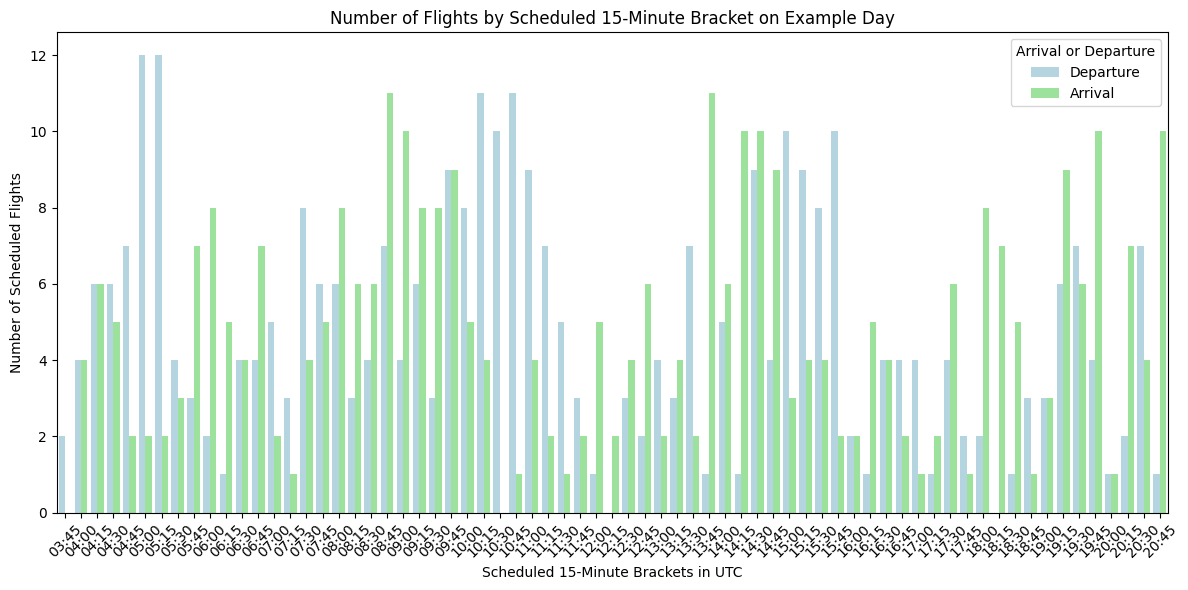

In [86]:


# Filter the data for August 24 - day with 95% normal concept flown 

specific_date = '2024-08-24'
filtered_flights_spec_date = filtered_movements_90[
    (filtered_movements_90['STA_STD_Datetime'].dt.date == pd.to_datetime(specific_date).date())
]

filtered_flights_spec_date['SchedTime15Min'] = filtered_flights_spec_date['STA_STD_Datetime'].dt.floor('15T').dt.strftime('%H:%M')
# Rename the 'Bewegungsart LSV' column to 'Arrival or Departure'
filtered_flights_spec_date = filtered_flights_spec_date.rename(columns={'Bewegungsart LSV': 'Arrival or Departure'})
# Sort the 'SchedTime15Min' column in ascending order
filtered_flights_spec_date = filtered_flights_spec_date.sort_values(by='SchedTime15Min')

plt.figure(figsize=(12, 6))
sns.countplot(x='SchedTime15Min', hue='Arrival or Departure', data=filtered_flights_spec_date,
              palette={'Departure': 'lightblue', 'Arrival': 'lightgreen'})
plt.title('Number of Flights by Scheduled 15-Minute Bracket on Example Day')
plt.ylabel('Number of Scheduled Flights')
plt.xlabel('Scheduled 15-Minute Brackets in UTC')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\louis\AppData\Local\Temp\ipykernel_10636\1509096724.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  filtered_flights_spec_date['SchedTime15Min'] = filtered_flights_spec_date['STA_STD_Datetime'].dt.floor('15T').dt.strftime('%H:%M')
C:\Users\louis\AppData\Local\Temp\ipykernel_10636\1509096724.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_flights_spec_date['SchedTime15Min'] = filtered_flights_spec_date['STA_STD_Datetime'].dt.floor('15T').dt.strftime('%H:%M')


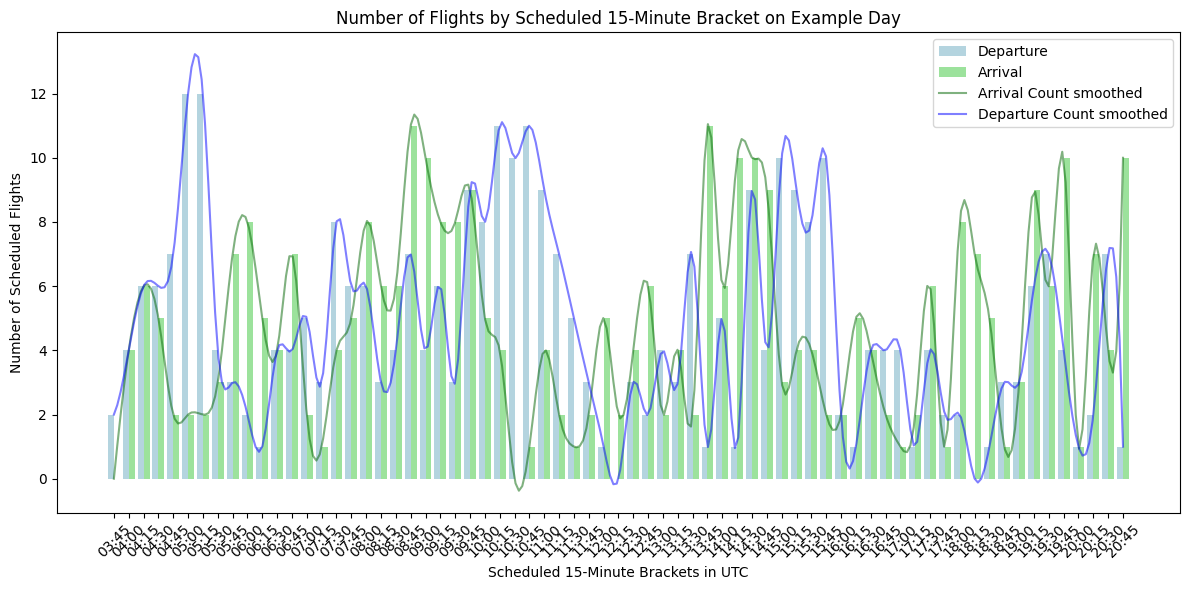

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# Assuming 'filtered_movements_90' is your DataFrame and already filtered for the specific date.

specific_date = '2024-08-24'
filtered_flights_spec_date = filtered_movements_90[
    (filtered_movements_90['STA_STD_Datetime'].dt.date == pd.to_datetime(specific_date).date())
]

# Create a new column for the scheduled time rounded to the nearest 15 minutes
filtered_flights_spec_date['SchedTime15Min'] = filtered_flights_spec_date['STA_STD_Datetime'].dt.floor('15T').dt.strftime('%H:%M')

# Rename the 'Bewegungsart LSV' column to 'Arrival or Departure'
filtered_flights_spec_date = filtered_flights_spec_date.rename(columns={'Bewegungsart LSV': 'Arrival or Departure'})

# Sort the DataFrame by 'SchedTime15Min'
filtered_flights_spec_date = filtered_flights_spec_date.sort_values(by='SchedTime15Min')

# Calculate counts for each scheduled time and arrival/departure type
count_data = filtered_flights_spec_date.groupby(['SchedTime15Min', 'Arrival or Departure']).size().unstack(fill_value=0)

# Reset index to plot
count_data = count_data.reset_index()

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the count data using seaborn
sns.countplot(x='SchedTime15Min', hue='Arrival or Departure', data=filtered_flights_spec_date,
              palette={'Departure': 'lightblue', 'Arrival': 'lightgreen'})

# Prepare data for smooth curves
x = np.arange(len(count_data['SchedTime15Min']))  # Numeric x values
arrival_counts = count_data['Arrival'].values
departure_counts = count_data['Departure'].values

# Create smooth lines using spline interpolation
x_smooth = np.linspace(x.min(), x.max(), 300)  # Smooth x values
arrival_smooth = make_interp_spline(x, arrival_counts)(x_smooth)  # Smooth arrival line
departure_smooth = make_interp_spline(x, departure_counts)(x_smooth)  # Smooth departure line

# Plot the smooth lines
plt.plot(x_smooth, arrival_smooth, color='darkgreen', linestyle='-', label='Arrival Count smoothed', alpha=0.5)
plt.plot(x_smooth, departure_smooth, color='blue', linestyle='-', label='Departure Count smoothed', alpha=0.5)

# Set plot title and labels
plt.title('Number of Flights by Scheduled 15-Minute Bracket on Example Day')
plt.ylabel('Number of Scheduled Flights')
plt.xlabel('Scheduled 15-Minute Brackets in UTC')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ticks=x, labels=count_data['SchedTime15Min'])

# Show the legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


C:\Users\louis\AppData\Local\Temp\ipykernel_10636\1971641829.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  filtered_flights_spec_date['SchedTime15Min'] = filtered_flights_spec_date['STA_STD_Datetime'].dt.floor('15T').dt.strftime('%H:%M')
C:\Users\louis\AppData\Local\Temp\ipykernel_10636\1971641829.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_flights_spec_date['SchedTime15Min'] = filtered_flights_spec_date['STA_STD_Datetime'].dt.floor('15T').dt.strftime('%H:%M')


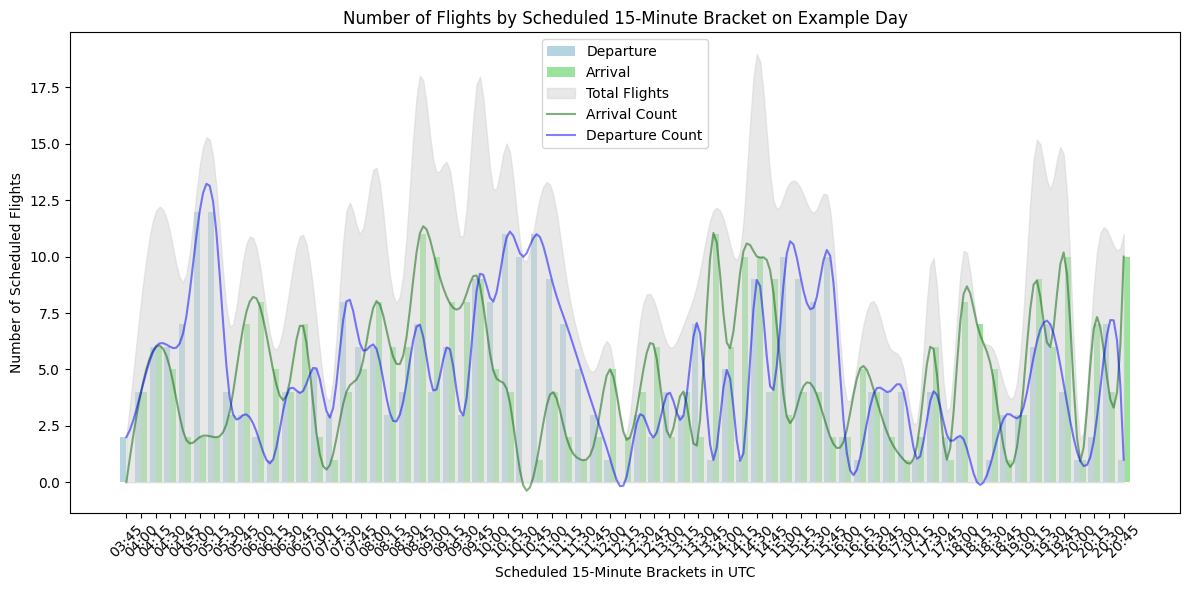

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# Assuming 'filtered_movements_90' is your DataFrame and already filtered for the specific date.

specific_date = '2024-08-24'
filtered_flights_spec_date = filtered_movements_90[
    (filtered_movements_90['STA_STD_Datetime'].dt.date == pd.to_datetime(specific_date).date())
]

# Create a new column for the scheduled time rounded to the nearest 15 minutes
filtered_flights_spec_date['SchedTime15Min'] = filtered_flights_spec_date['STA_STD_Datetime'].dt.floor('15T').dt.strftime('%H:%M')

# Rename the 'Bewegungsart LSV' column to 'Arrival or Departure'
filtered_flights_spec_date = filtered_flights_spec_date.rename(columns={'Bewegungsart LSV': 'Arrival or Departure'})

# Sort the DataFrame by 'SchedTime15Min'
filtered_flights_spec_date = filtered_flights_spec_date.sort_values(by='SchedTime15Min')

# Calculate counts for each scheduled time and arrival/departure type
count_data = filtered_flights_spec_date.groupby(['SchedTime15Min', 'Arrival or Departure']).size().unstack(fill_value=0)

# Reset index to plot
count_data = count_data.reset_index()

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the count data using seaborn
sns.countplot(x='SchedTime15Min', hue='Arrival or Departure', data=filtered_flights_spec_date,
              palette={'Departure': 'lightblue', 'Arrival': 'lightgreen'})

# Prepare data for smooth curves
x = np.arange(len(count_data['SchedTime15Min']))  # Numeric x values
arrival_counts = count_data['Arrival'].values
departure_counts = count_data['Departure'].values

# Create smooth lines using spline interpolation
x_smooth = np.linspace(x.min(), x.max(), 300)  # Smooth x values
arrival_smooth = make_interp_spline(x, arrival_counts)(x_smooth)  # Smooth arrival line
departure_smooth = make_interp_spline(x, departure_counts)(x_smooth)  # Smooth departure line

# Plot the grey area background
plt.fill_between(x_smooth, arrival_smooth + departure_smooth, color='lightgrey', alpha=0.5, label='Total Flights')

# Plot the smooth lines
plt.plot(x_smooth, arrival_smooth, color='darkgreen', linestyle='-', label='Arrival Count', alpha=0.5)
plt.plot(x_smooth, departure_smooth, color='blue', linestyle='-', label='Departure Count', alpha=0.5)

# Set plot title and labels
plt.title('Number of Flights by Scheduled 15-Minute Bracket on Example Day')
plt.ylabel('Number of Scheduled Flights')
plt.xlabel('Scheduled 15-Minute Brackets in UTC')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ticks=x, labels=count_data['SchedTime15Min'])

# Show the legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [89]:
type(movements_cleaned['STA_STD_Time'].iloc[0])

str

C:\Users\louis\AppData\Local\Temp\ipykernel_10636\581246041.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  movements_cleaned['STA_STD_Time'] = pd.to_datetime(movements_cleaned['STA_STD_Time'])
C:\Users\louis\AppData\Local\Temp\ipykernel_10636\581246041.py:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  movements_cleaned['Rounded_Time'] = movements_cleaned['STA_STD_Time'].dt.round('15T')


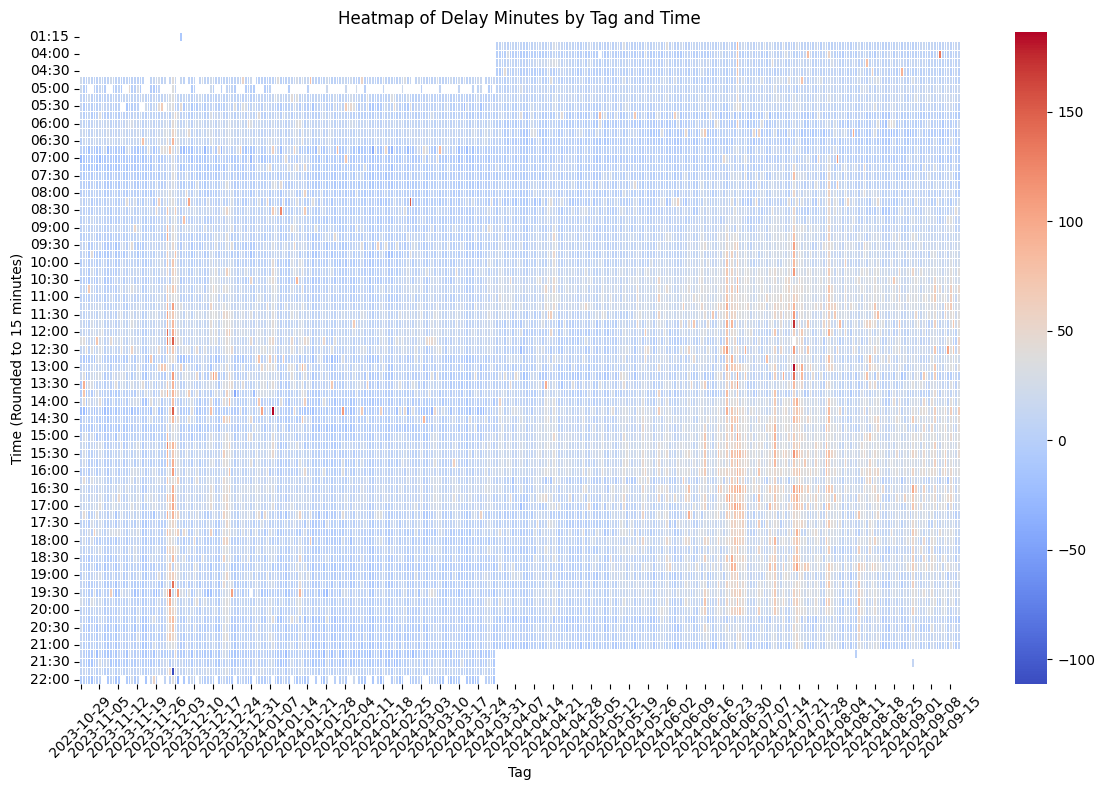

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import colors as mcolors

# Sample DataFrame
# movements_cleaned = pd.DataFrame({
#     'Tag': [...],
#     'STA_STD_Time': ['14:05', '14:10', '14:20', ...],  # Example time strings
#     'DelayMinutes': [5, 10, 15, ...]
# })

# Ensure that 'STA_STD_Time' is in string format before conversion
movements_cleaned['STA_STD_Time'] = pd.to_datetime(movements_cleaned['STA_STD_Time'])
movements_cleaned['Tag'] = movements_cleaned['Tag'].astype(str).str[:10]
# Round 'STA_STD_Time' to the nearest 15 minutes
movements_cleaned['Rounded_Time'] = movements_cleaned['STA_STD_Time'].dt.round('15T')

#Convert Rounded_Time to string format 'HH:MM'
movements_cleaned['Rounded_Time'] = movements_cleaned['Rounded_Time'].dt.strftime('%H:%M')

# Create a pivot table
pivot_table = movements_cleaned.pivot_table(
    index='Rounded_Time', 
    columns='Tag', 
    values='DelayMinutes', 
    aggfunc='mean' 
)


# Step 4: Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Delay Minutes by Tag and Time')
plt.xlabel('Tag')
plt.ylabel('Time (Rounded to 15 minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [91]:
arr_no_outliers = delayminutes_arr_90.copy()
dep_no_outliers = delayminutes_dep_90.copy()
# Calculate percentiles
p05_arr_90 = np.percentile(delayminutes_arr_90['DelayMinutes'], 0.5)
p955_arr_90 = np.percentile(delayminutes_arr_90['DelayMinutes'], 99.5)

p05_dep_90 = np.percentile(delayminutes_dep_90['DelayMinutes'], 0.5)
p955_dep_90 = np.percentile(delayminutes_dep_90['DelayMinutes'], 99.5)

arr_no_outliers = arr_no_outliers[arr_no_outliers['DelayMinutes']>= p05_arr_90]
arr_no_outliers = arr_no_outliers[arr_no_outliers['DelayMinutes']<= p955_arr_90]
dep_no_outliers = dep_no_outliers[dep_no_outliers['DelayMinutes']>= p05_dep_90]
dep_no_outliers = dep_no_outliers[dep_no_outliers['DelayMinutes']<= p955_arr_90]
                       


C:\Users\louis\AppData\Local\Temp\ipykernel_10636\1743412262.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dep_no_outliers['STA_STD_Time'] = pd.to_datetime(dep_no_outliers['STA_STD_Time'])
C:\Users\louis\AppData\Local\Temp\ipykernel_10636\1743412262.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dep_no_outliers['Rounded_Time'] = dep_no_outliers['STA_STD_Time'].dt.round('15T')


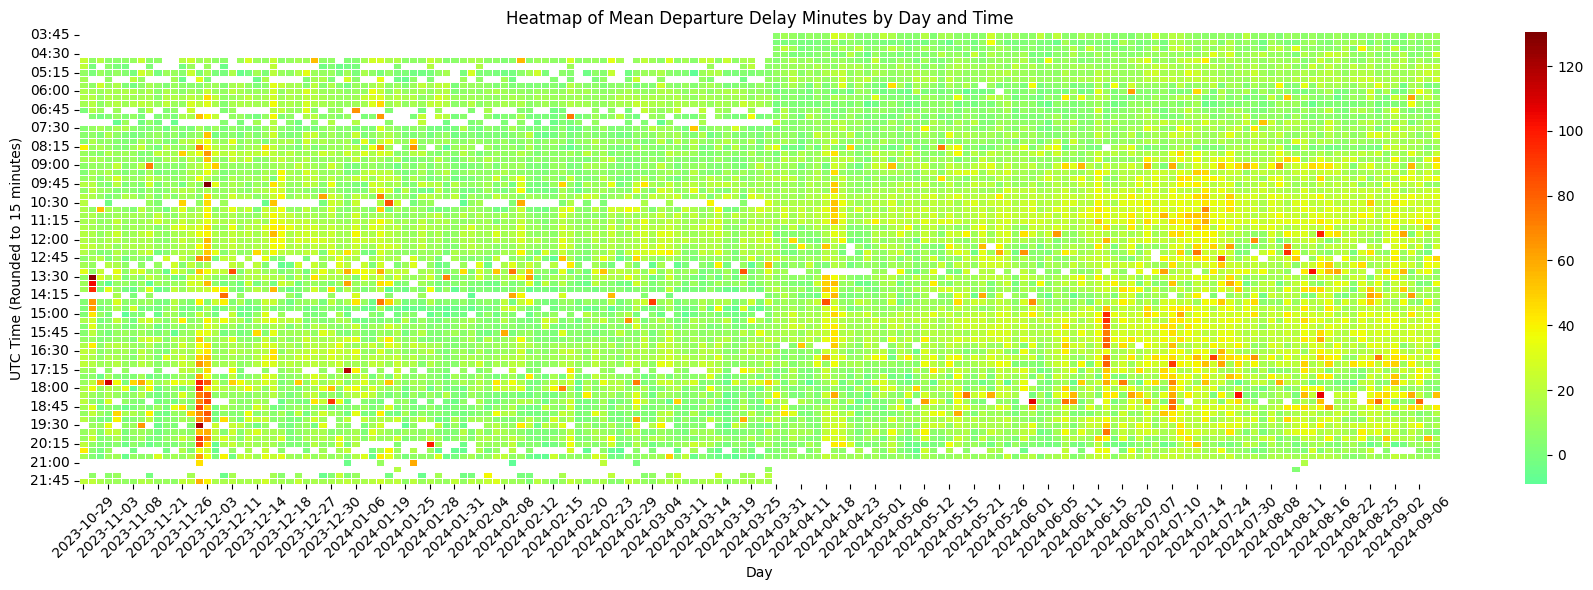

In [92]:

# Ensure that 'STA_STD_Time' is in string format before conversion
dep_no_outliers['STA_STD_Time'] = pd.to_datetime(dep_no_outliers['STA_STD_Time'])
dep_no_outliers['Tag'] = dep_no_outliers['Tag'].astype(str).str[:10]
# Round 'STA_STD_Time' to the nearest 15 minutes
dep_no_outliers['Rounded_Time'] = dep_no_outliers['STA_STD_Time'].dt.round('15T')

#Convert Rounded_Time to string format 'HH:MM'
dep_no_outliers['Rounded_Time'] = dep_no_outliers['Rounded_Time'].dt.strftime('%H:%M')
dep_no_outliers

# Create a pivot table
pivot_table_dep_90_no_outliers = dep_no_outliers.pivot_table(
    index='Rounded_Time', 
    columns='Tag', 
    values='DelayMinutes', 
    aggfunc='mean' 
)
pivot_table_dep_90_no_outliers

# Step 1: Identify the absolute min and max
abs_min_dep = pivot_table_dep_90_no_outliers.min().min()  # Minimum value in the entire dataset
abs_max_dep = pivot_table_dep_90_no_outliers.max().max()  # Maximum value in the entire dataset


# Step 4: Create the heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(pivot_table_dep_90_no_outliers, cmap='jet', center=0, linewidths=.5)
plt.title('Heatmap of Mean Departure Delay Minutes by Day and Time')
plt.xlabel('Day')
plt.ylabel('UTC Time (Rounded to 15 minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:

# Ensure that 'STA_STD_Time' is in string format before conversion
arr_no_outliers['STA_STD_Time'] = pd.to_datetime(arr_no_outliers['STA_STD_Time'])
arr_no_outliers['Tag'] = arr_no_outliers['Tag'].astype(str).str[:10]
# Round 'STA_STD_Time' to the nearest 15 minutes
arr_no_outliers['Rounded_Time'] = arr_no_outliers['STA_STD_Time'].dt.round('15T')

#Convert Rounded_Time to string format 'HH:MM'
arr_no_outliers['Rounded_Time'] = arr_no_outliers['Rounded_Time'].dt.strftime('%H:%M')


# Create a pivot table
pivot_table_arr_90_no_outliers = arr_no_outliers.pivot_table(
    index='Rounded_Time', 
    columns='Tag', 
    values='DelayMinutes', 
    aggfunc='mean' 
)


# Step 1: Identify the absolute min and max
abs_min_dep = pivot_table_arr_90_no_outliers.min().min()  # Minimum value in the entire dataset
abs_max_dep = pivot_table_arr_90_no_outliers.max().max()  # Maximum value in the entire dataset


# Step 4: Create the heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(pivot_table_arr_90_no_outliers, cmap='jet', center=0, norm=norm, linewidths=.5)
plt.title('Heatmap of Mean Arrival Delay Minutes by Day and Time')
plt.xlabel('Day')
plt.ylabel('UTC Time (Rounded to 15 minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_10636\2910011501.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  arr_no_outliers['STA_STD_Time'] = pd.to_datetime(arr_no_outliers['STA_STD_Time'])
C:\Users\louis\AppData\Local\Temp\ipykernel_10636\2910011501.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  arr_no_outliers['Rounded_Time'] = arr_no_outliers['STA_STD_Time'].dt.round('15T')


NameError: name 'norm' is not defined

<Figure size 1800x600 with 0 Axes>

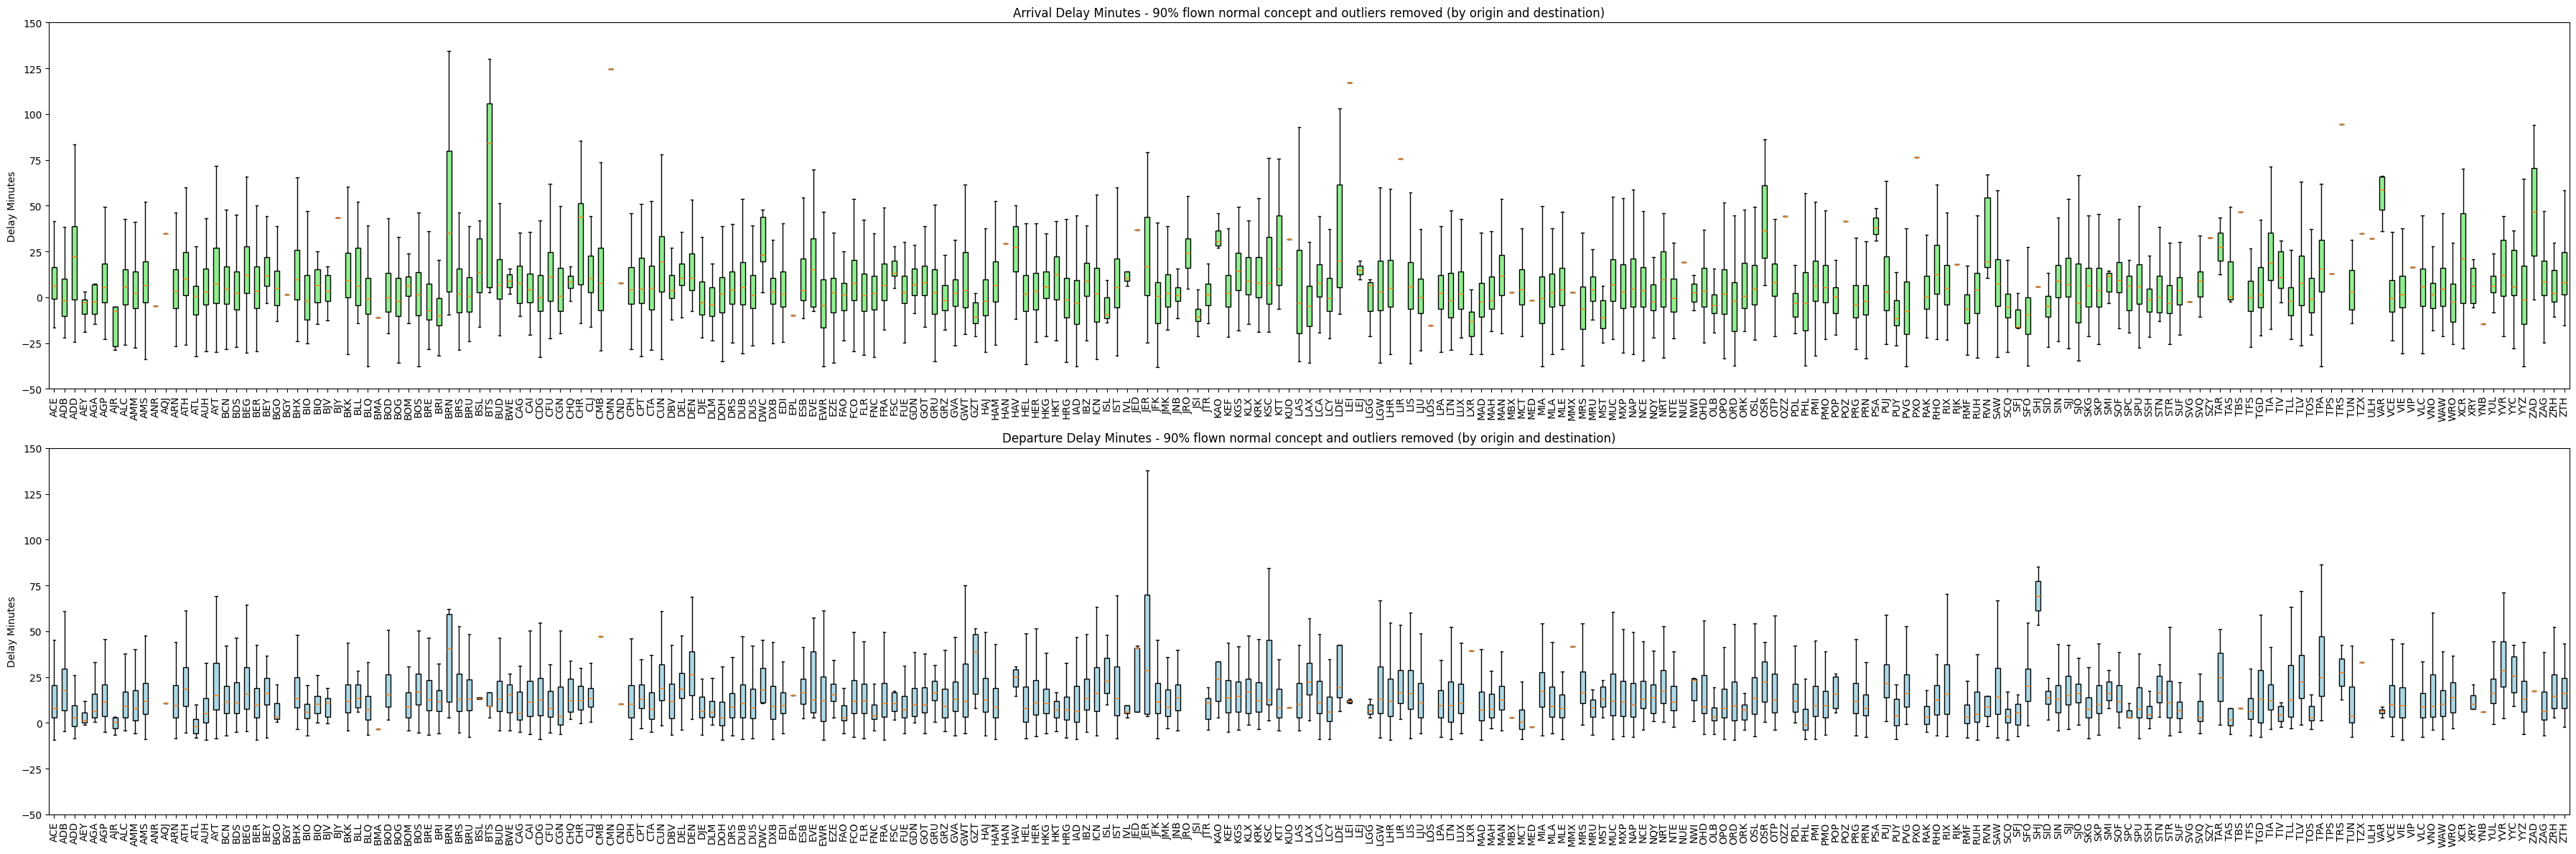

In [53]:
# Plot for Aircrafttypes
# Create a figure with two subplots (2 rows, 1 column)
plt.figure(figsize=(36, 12))

# Define unique aircrafttypes
orig_des = np.sort(arr_no_outliers['3 let code Airport'].unique())

# Create lists to hold the data for each aircrafttypes (no weekday separation)
arrival_data = [arr_no_outliers[arr_no_outliers['3 let code Airport'] == orig_des]['DelayMinutes'].values 
                for orig_des in orig_des]

departure_data = [dep_no_outliers[dep_no_outliers['3 let code Airport'] == orig_des]['DelayMinutes'].values 
                  for orig_des in orig_des]

# Colors for arrival and departure plots
arrival_colors = ['lightgreen'] * len(orig_des)
departure_colors = ['lightblue'] * len(orig_des)

# Plot 1: Arrival 90% data
plt.subplot(2, 1, 1)
box1 = plt.boxplot(arrival_data, showfliers=False, patch_artist=True, positions=range(1, len(orig_des) + 1))
for patch, color in zip(box1['boxes'], arrival_colors):
    patch.set_facecolor(color)
plt.title('Arrival Delay Minutes - 90% flown normal concept and outliers removed (by origin and destination)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, len(orig_des) + 1), orig_des, rotation=90, fontsize=10)  # Set x-ticks to orig_des names
plt.ylim(-50, 150)

# Plot 2: Departure 90% data
plt.subplot(2, 1, 2)
box2 = plt.boxplot(departure_data, showfliers=False, patch_artist=True, positions=range(1, len(orig_des) + 1))
for patch, color in zip(box2['boxes'], departure_colors):
    patch.set_facecolor(color)
plt.title('Departure Delay Minutes - 90% flown normal concept and outliers removed (by origin and destination)')
plt.ylabel('Delay Minutes')
plt.xticks(range(1, len(orig_des) + 1), orig_des, rotation=90, fontsize=10)  # Set x-ticks to orig_des names
plt.ylim(-50, 150)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
